# INTRODUCTION 

In this EDA assignment we are provided with the two types of data sets one is an application data which contains
all the information of the client at the time of application, on the other hand the other data is the previous application
that has client previous loan data. It contains the data whether the previous application had been Approved, Cancelled, Refused 
or Unused.


# PROBLEM STATEMENT 😥

The provided data is related to loan application. The aim is to perform Exploratory Data Analysis (EDA) on this data to 
understand  the features and their relationships, and to identify important driver variables that can predict whether a client 
will have difficulty repaying their loan.
we are expected to recognise patterns which indicates if a client has any difficulty/strain in paying their 
installments which may leads to taking actions like denying the loan, reducing the amount of loan. This will make sure 
that the consumers who are capable of repaying loan are not rejected. Here we need to identify the driving factors/variables
behind loan default.


In [222]:
# import important warnings.
import warnings
warnings.filterwarnings(action="ignore")


In [223]:
# import the useful libraries.
import pandas as pd
import numpy as np

#Visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# APPLICATION DATA🤓

In [224]:
#read the data set of "application data" in application_data:
application_data = pd.read_csv("application_data EDA.csv ")

In [225]:
#print the head of the data frame:
application_data.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0  

[5 rows x 122 columns]

In [226]:
#print the shape of the data to get to know the number of rows and columns.
application_data.shape

(307511, 122)

In [227]:
# data cleaning:
# find the percentage of null values and then drop the columns that has null percentage more than 35:

application_data_null = application_data.isnull().mean()*100


In [228]:
#selecting the columns to be dropped from the application data which is more than 30 percentage:

dropped_application_data = application_data_null[application_data_null>35].index #.index will fetch the columns names with more than 35% of null values.


In [9]:
#dropping columns having null values more than 35%:
application_data = application_data.drop(columns=dropped_application_data)
application_data.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_C

In [229]:
#verify how many columns are left after dropping undesired columns:
application_data.shape

(307511, 122)

In [230]:
#check the data type :
application_data.dtypes

SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
                               ...   
AMT_REQ_CREDIT_BUREAU_DAY     float64
AMT_REQ_CREDIT_BUREAU_WEEK    float64
AMT_REQ_CREDIT_BUREAU_MON     float64
AMT_REQ_CREDIT_BUREAU_QRT     float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
Length: 122, dtype: object

In [ ]:
# fill missing values with appropriate values.

1 filling missing categorical values with mode is appropriate because it maintains the distribution of 
   categories.
2 filling missing numerical values with median is appropriate because it is not affected by outliers or extreme values.

In [231]:
# filling missing values in application data:
for i in application_data.columns:
    if application_data[i].dtype=="object":
        application_data[i].fillna(application_data[i].mode()[0], inplace=True)
    else:
        application_data[i].fillna(application_data[i].median(), inplace=True)
        
# we can do it separately by taking each column but that would be a tedious task to fillna for 73 columns so instead of taking it one by one we can run a for loop .

In [232]:
#verify if there are still any missing values:
print(application_data.isnull().sum().sum())

0


In [233]:
# Separate numerical and categorical columns in application data as it is easier to make lists of desired columns for further analysis:

# find the numerical columns
num_application_data = application_data.select_dtypes(include=['float64', 'int64']).columns

# find the categorical columns
cat_application_data = application_data.select_dtypes(include=['object']).columns

num_application_data, cat_application_data #print the columns

# here select.dtypes will select the columns having the required data types which is stated under include.
# .columns will extract the column names which satisfies the condition of the data types.


(Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
        'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
        'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
        ...
        'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
        'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
        'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
        'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
        'AMT_REQ_CREDIT_BUREAU_YEAR'],
       dtype='object', length=106),
 Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
        'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
        'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
        'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE',
        'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE'],
       dtype='object'))

In [234]:
# Selecting columns for the application_data for further analysis (including "SK_ID_CURR")

col_application_data = [
    'SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
    'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'NAME_INCOME_TYPE',
    'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'DAYS_BIRTH', 'DAYS_EMPLOYED',  
    'CNT_FAM_MEMBERS', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
    'AMT_REQ_CREDIT_BUREAU_YEAR','OCCUPATION_TYPE'
]



In [235]:
# Create new data frames with the selected columns:


selected_application_data = application_data[col_application_data] #  passing the list of seleced columns will create a new data frame with the desired columns for further analysis.

In [236]:
# Segmenting the selected columns into categorical and numerical columns:
# In order to analyse the relationships of the variables and the variations through visualizations first we need to separate categorical columns and numerical columns.


cat_col_application_data = selected_application_data.select_dtypes(include=['object']).columns.tolist()
num_col_application_data = selected_application_data.select_dtypes(include=['float64', 'int64']).columns.tolist()

In [19]:
#print the columns:

cat_col_application_data, num_col_application_data

(['NAME_CONTRACT_TYPE',
  'CODE_GENDER',
  'FLAG_OWN_CAR',
  'FLAG_OWN_REALTY',
  'NAME_INCOME_TYPE',
  'NAME_EDUCATION_TYPE',
  'NAME_FAMILY_STATUS',
  'OCCUPATION_TYPE'],
 ['SK_ID_CURR',
  'TARGET',
  'CNT_CHILDREN',
  'AMT_INCOME_TOTAL',
  'AMT_CREDIT',
  'AMT_ANNUITY',
  'DAYS_BIRTH',
  'DAYS_EMPLOYED',
  'CNT_FAM_MEMBERS',
  'EXT_SOURCE_2',
  'EXT_SOURCE_3',
  'OBS_30_CNT_SOCIAL_CIRCLE',
  'DEF_30_CNT_SOCIAL_CIRCLE',
  'AMT_REQ_CREDIT_BUREAU_YEAR'])

In [ ]:
# Application Data (reasons for selecting these columns are listed below)
#Categorical Columns:
"NAME_CONTRACT_TYPE": Type of loan (e.g., cash or revolving) helps to understand the loan's nature.
"CODE_GENDER": Gender might have correlations with financial behavior.
"FLAG_OWN_CAR", "FLAG_OWN_REALTY": Ownership of assets like cars and real estate might indicate financial stability.
"NAME_INCOME_TYPE": Income type gives insights into the client's earning model, which can impact loan repayment.
"NAME_EDUCATION_TYPE": Educational level may relate with financial literacy and stability.
"NAME_FAMILY_STATUS": helps understand family expenses, potentially impacting loan repayment.
 "OCCUPATION_TYPE" : it shows the clients professional background that makes it easy for the bank to provide loan according to th eiheir income and job stability.
    
#Numerical Columns:
    
"TARGET": to identify if a client has payment difficulties.
"CNT_CHILDREN", "CNT_FAM_MEMBERS": Family size might impact the client's financial conditions.
"AMT_INCOME_TOTAL", "AMT_CREDIT, AMT_ANNUITY": Financial metrics to assess the client's economic status.
"DAYS_BIRTH", "DAYS_EMPLOYED": Age and employment duration can indicate stability and risk.
"EXT_SOURCE_2", "EXT_SOURCE_3": External credit scores may provide an external risk assessment.
"OBS_30_CNT_SOCIAL_CIRCLE","DEF_30_CNT_SOCIAL_CIRCLE": Social behaviour metrics might correlate with financial behaviour.
"AMT_REQ_CREDIT_BUREAU_YEAR": Credit inquiries can show financial seeking behaviour.

In [237]:
#identifying outliers in the numerical columns:
selected_application_data.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY     DAYS_BIRTH  DAYS_EMPLOYED  \
count  3.075110e+05  307511.000000  307511.000000  307511.000000   
mean   5.990260e+05   27108.487841  -16036.995067   63815.045904   
std    4.024908e+05   14493.461065    4363.988632  141275.766519   
min    4.500000e+04    1615.500000  -25229.000000  -17912.000000   
25%    2.700000e+05   16524.000000  -19682.000000   -2760.000000   
50%    5.135310e+05   24903.000000  -15750.000000   -1213.000000   
75%    8.086500e+05   34596.000000  -12413.000000    -289.000000   
max    4.050000e+06  258025.500000   -7489.000000  365243.000000   

       CNT_FAM_MEMBERS  EXT_SOURCE_2   EXT_SOURCE_3  OBS_30_CNT_SOCIAL_CIRCLE  \
count    307511.000000  3.075110e+05  307511.000000             307511.000000   
mean          2.152664  5.145034e-01       0.515695                  1.417523   
std           0.910679  1.908699e-01       0.174736                  2.398395   
min           1.000000  8.173617e-08       0.000527                  0.000000   
25%           2.000000  3.929737e-01       0.417100                  0.000000   
50%           2.000000  5.659614e-01       0.535276                  0.000000   
75%           3.000000  6.634218e-01       0.636376                  2.000000   
max          20.000000  8.549997e-01       0.896010                348.000000   

       DEF_30_CNT_SOCIAL_CIRCLE  AMT_REQ_CREDIT_BUREAU_YEAR  
count             307511.000000               307511.000000  
mean                   0.142944                    1.778463  
std                    0.446033                    1.765523  
min                    0.000000                    0.000000  
25%                    0.000000                    1.000000  
50%                    0.000000                    1.000000  
75%                    0.000000                    3.000000  
max                   34.000000                   25.000000

In [238]:
# let's convert AMT CREDIT into rupees from dollars into a new column AMT_CREDIT_INR.
#let's assume that $1 = 75 rupee
rate = 75
selected_application_data['AMT_CREDIT_INR'] = selected_application_data['AMT_CREDIT'] *rate

In [239]:
# let's convert DAYS_BIRTH and DAYS_EMPLOYED values into positive with pandas .abs method:

selected_application_data['DAYS_BIRTH'] = selected_application_data['DAYS_BIRTH'].abs()
selected_application_data['DAYS_EMPLOYED'] = selected_application_data['DAYS_EMPLOYED'].abs()

In [240]:
# let us convert days birth into years in a new column years birth.

selected_application_data['YEARS_BIRTH'] = selected_application_data['DAYS_BIRTH'] / 365.25
selected_application_data['DAYS_EMPLOYED'] = selected_application_data['DAYS_EMPLOYED'].abs()/365.25

# UNIVARIATE ANALYSIS (APPLICATION DATA)🤞

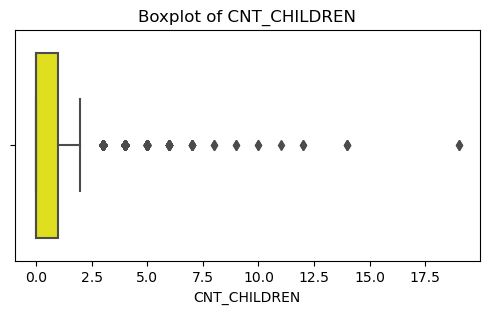

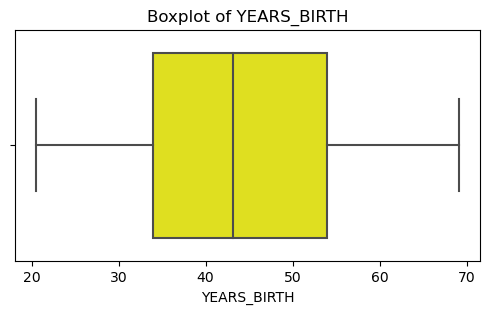

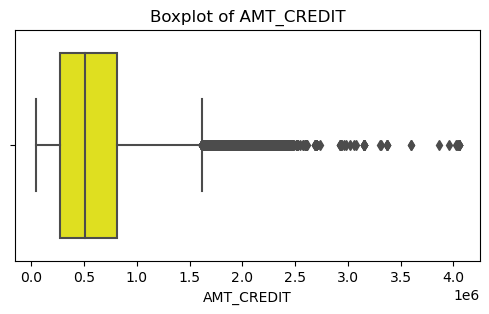

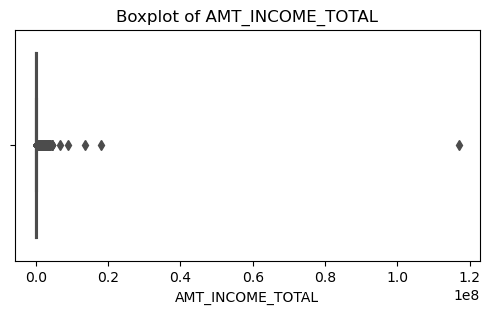

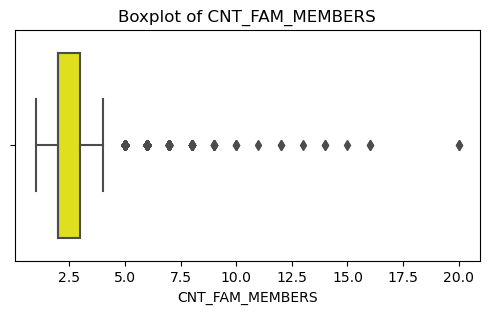

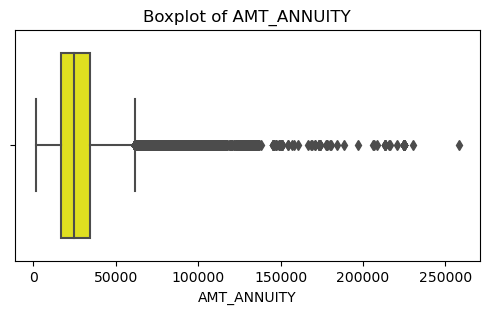

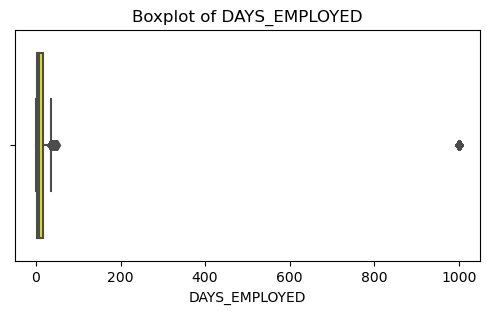

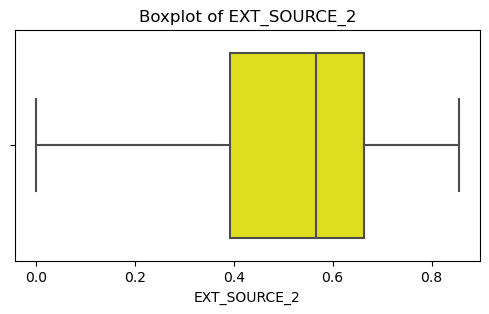

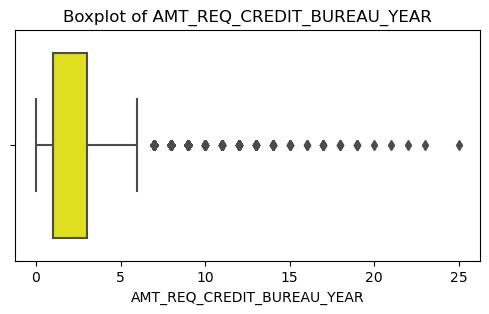

In [241]:
#visual representation of outliers with the help of boxplots:

# List of numerical columns to analyze in application data
numerical_columns_application = ['CNT_CHILDREN', 'YEARS_BIRTH', 'AMT_CREDIT','AMT_INCOME_TOTAL','CNT_FAM_MEMBERS','AMT_ANNUITY','DAYS_EMPLOYED','EXT_SOURCE_2','AMT_REQ_CREDIT_BUREAU_YEAR']

# Looping the numerical columns for selected application_data
for i in numerical_columns_application:
    plt.figure(figsize=(6, 3))
    sns.boxplot(x=selected_application_data[i], color="yellow")
    plt.title('Boxplot of ' + i)
    plt.show()

In [ ]:
#handling outliers :

we can handle outliers by capping the values.example:
for the lower bound we can cap it with quantile(0.01) and for the upper bound we can cap it with quantile(0.99)


In [ ]:
#inferences that can be drawn from above visualizations for outliers:

1. 'AMT_INCOME_TOTAL' A large number of outliers indicate applicants with high incomes, while the main box shows the middle 50% of incomes.

2. 'AMT_CREDIT'Outliers could represent unusually large or small credit amounts.

3. 'YEARS_BIRTH' age showS a fairly uniform distribution indicating the age groups that are more common among applicants.

4. 'CNT_CHILDREN' Outliers indicates specific clients, such as large families, that have different financial needs and risks

In [242]:
selected_application_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 24 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   SK_ID_CURR                  307511 non-null  int64  
 1   TARGET                      307511 non-null  int64  
 2   NAME_CONTRACT_TYPE          307511 non-null  object 
 3   CODE_GENDER                 307511 non-null  object 
 4   FLAG_OWN_CAR                307511 non-null  object 
 5   FLAG_OWN_REALTY             307511 non-null  object 
 6   CNT_CHILDREN                307511 non-null  int64  
 7   AMT_INCOME_TOTAL            307511 non-null  float64
 8   AMT_CREDIT                  307511 non-null  float64
 9   AMT_ANNUITY                 307511 non-null  float64
 10  NAME_INCOME_TYPE            307511 non-null  object 
 11  NAME_EDUCATION_TYPE         307511 non-null  object 
 12  NAME_FAMILY_STATUS          307511 non-null  object 
 13  DAYS_BIRTH    

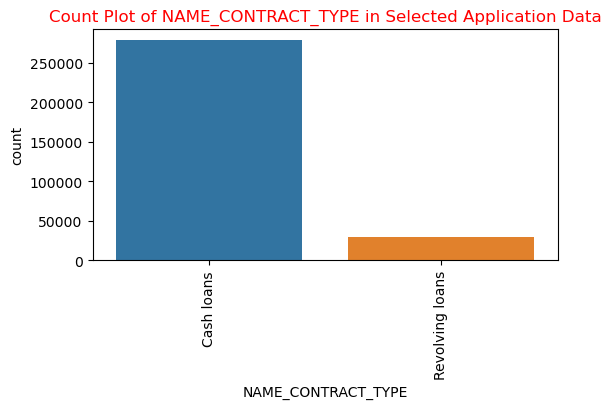

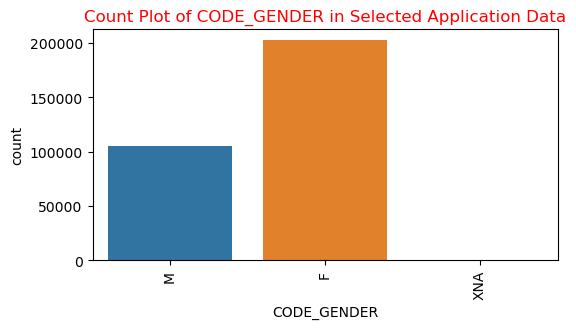

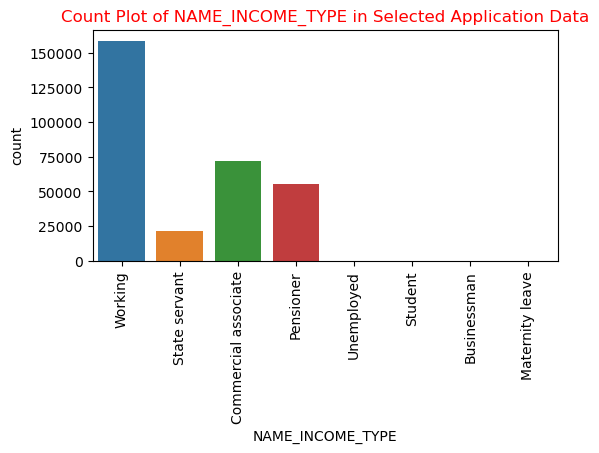

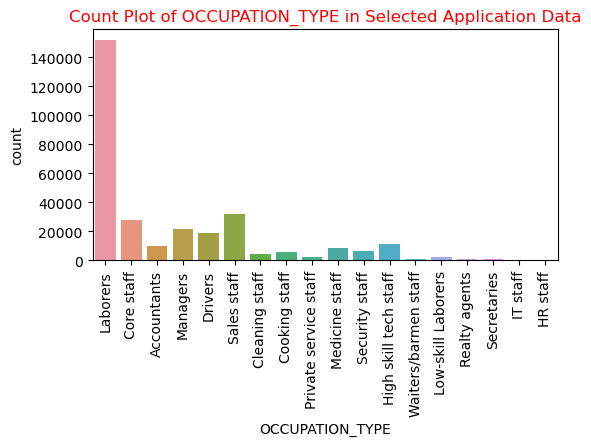

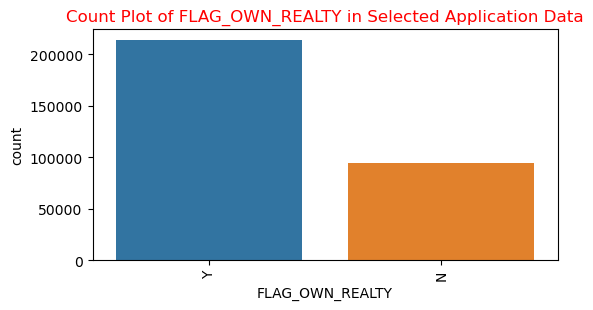

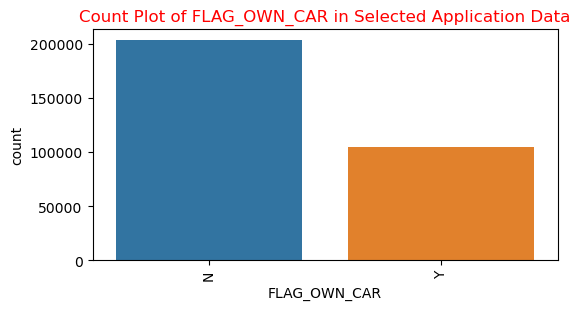

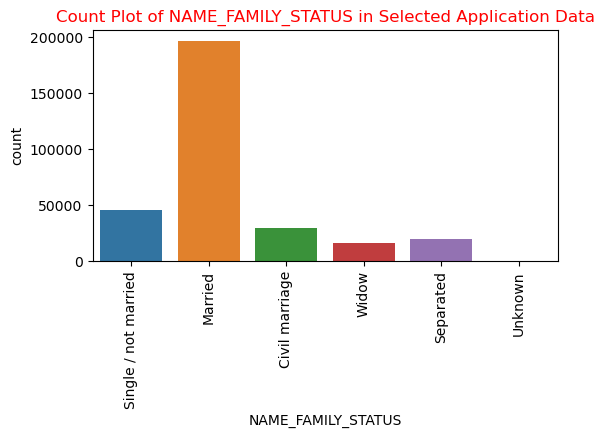

In [243]:
# List of categorical columns to analyze in selected application data
cat_application_data = ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'NAME_INCOME_TYPE','OCCUPATION_TYPE','FLAG_OWN_REALTY','FLAG_OWN_CAR','NAME_FAMILY_STATUS']

# Plotting count plots for each categorical column in application data
for i in cat_application_data:
    plt.figure(figsize=(6, 3))
    sns.countplot(x=i, data= selected_application_data)
    plt.title(f"Count Plot of {i} in Selected Application Data", color ="red")
    plt.xticks(rotation=90)
    plt.show()

In [ ]:
#inferences that can be drawn from above visualizations:

1. 'NAME_CONTRACT_TYPE' this shows the most common type of loan applied for is cash loans.
2. 'CODE_GENDER' here we can observe the proportion of male - female applicants. it shows female applicants are more.
3. 'NAME_INCOME_TYPE'certain income types are more prevalent that shows common employement status of applicants.
4. 'OCCUPATION_TYPE' occupations, such as "Laborers," "Sales staff," and "Core staff," are more in numbers in the dataset while "IT staff","HR staff" and "Realty agents"are less common
5. 'FLAG_OWN_CAR' this show people having car are not that interested in taking loans as comapred to the ones who have.
6. 'NAME_FAMILY_STATUS' here we can see that married and singles are most likely t take loans.

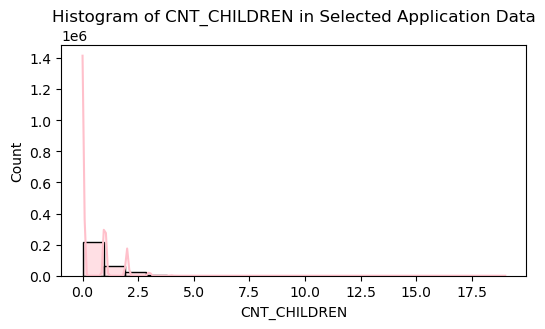

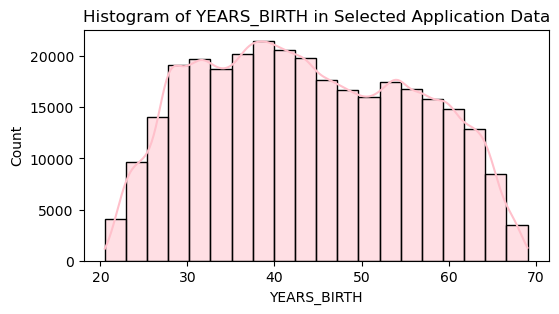

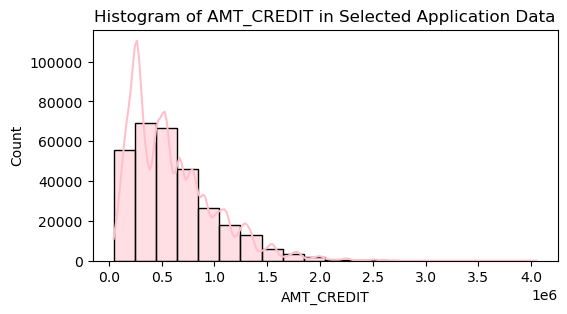

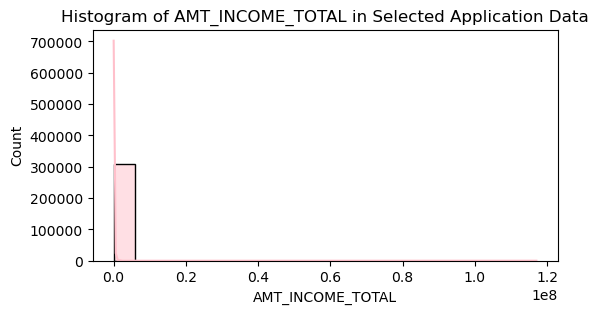

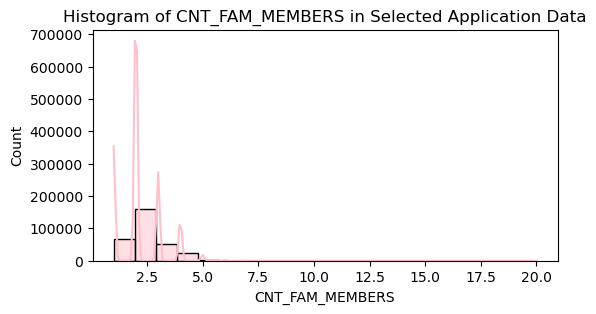

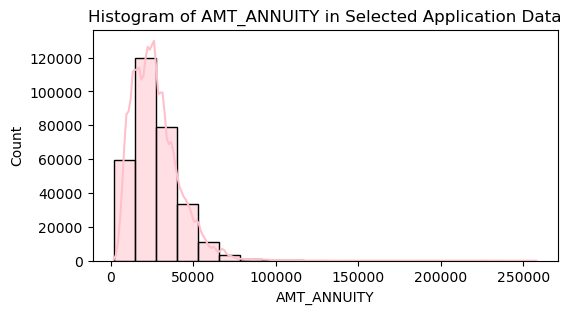

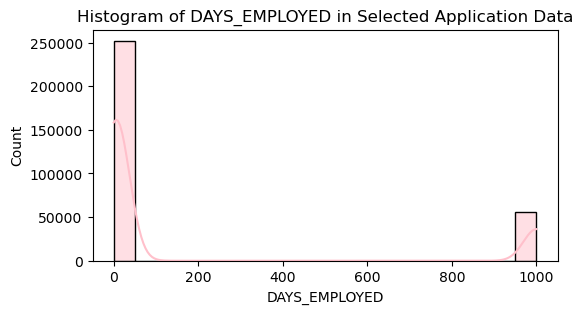

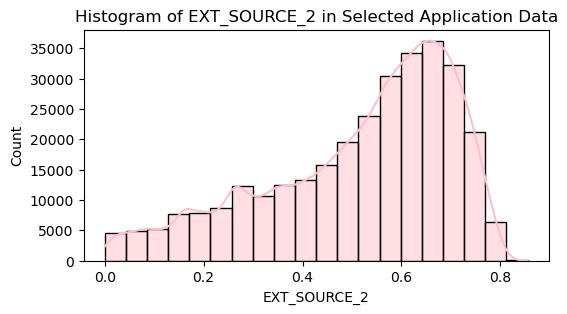

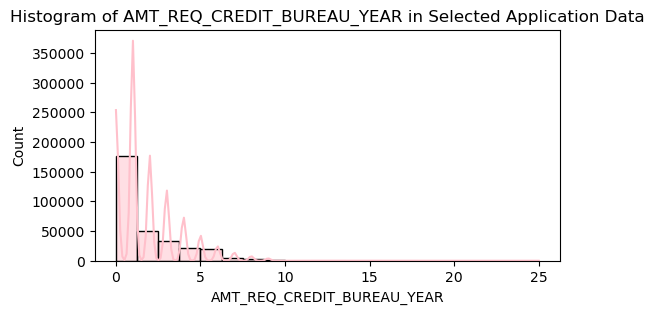

In [244]:
# List of numerical columns to analyze in application data

num_application = ['CNT_CHILDREN', 'YEARS_BIRTH', 'AMT_CREDIT','AMT_INCOME_TOTAL','CNT_FAM_MEMBERS','AMT_ANNUITY','DAYS_EMPLOYED','EXT_SOURCE_2','AMT_REQ_CREDIT_BUREAU_YEAR']


# Plotting histograms for each numerical column in application data

for i in num_application:
    plt.figure(figsize=(6, 3))
    sns.histplot(selected_application_data[i], bins=20, kde=True, color = "pink")
    plt.title(f"Histogram of {i} in Selected Application Data")
    plt.show()

In [ ]:
#inferences drawn from the hist plot of application data:
1.'CNT_CHILDREN'distribution of family sizes among applicants, that could affects loan needs and economical.
2.'YEARS_BIRTH'it shows the client age, allowing for targeted aged people for marketing.
3.'AMT_INCOME_TOTAL'This helps in understanding the income levels of the applicants.
4.'AMT_CREDIT' show people are taking loan of less amount - less risk to the bank
5.'CNT_FAM_MEMBERS'family with more members may have difficulty in repaying loan because of external expenses.
6.'AMT_ANNUITY' if monthly installments will be high people will not be able to repay loan.
7.'DAYS_EMPLOYED' clients who worked for more number of days may have stable jobs- can repay loan
8.'EXT_SOURCE_2' external credit score if this is high client is more likely to repay loan.
9.'AMT_REQ_CREDIT_BUREAU_YEAR' client with lots of request for loan can lead to warning signs.

# BIVARIATE ANALYSIS (APPLICATION DATA)✌️

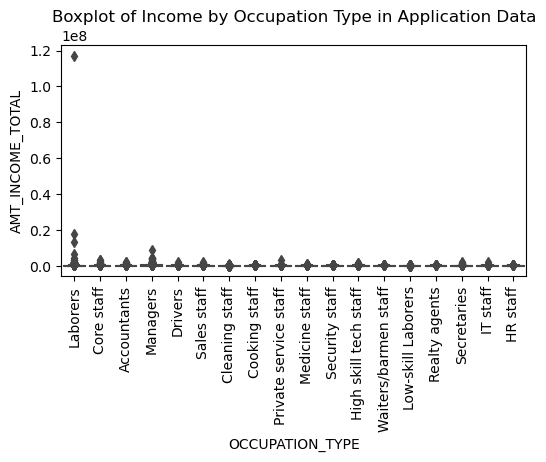

In [245]:
# Boxplot (e.g., OCCUPATION_TYPE vs. AMT_INCOME_TOTAL)

plt.figure(figsize=(6, 3))
sns.boxplot(x='OCCUPATION_TYPE', y='AMT_INCOME_TOTAL', data= selected_application_data)
plt.title('Boxplot of Income by Occupation Type in Application Data')
plt.xticks(rotation=90)
plt.show()

#comments: this distribution shows that there are few professions which is followed by large number of people and some of them earn exceptionally high and some don"t, whereas there are other professional areas toowith stable incomes.

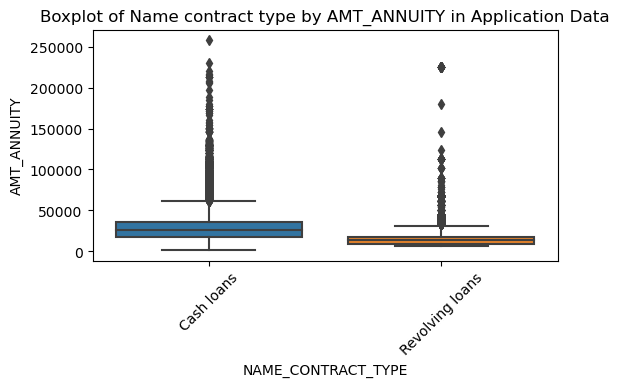

In [247]:
#boxplot for NAME_CONTRACT_TYPE v/s AMT_ANNUITY;

plt.figure(figsize=(6, 3))
sns.boxplot(x='NAME_CONTRACT_TYPE', y='AMT_ANNUITY', data= selected_application_data)
plt.title('Boxplot of Name contract type by AMT_ANNUITY in Application Data')
plt.xticks(rotation=45)
plt.show()
#comments: here more people are willing to pay monthly installments as cash loans.

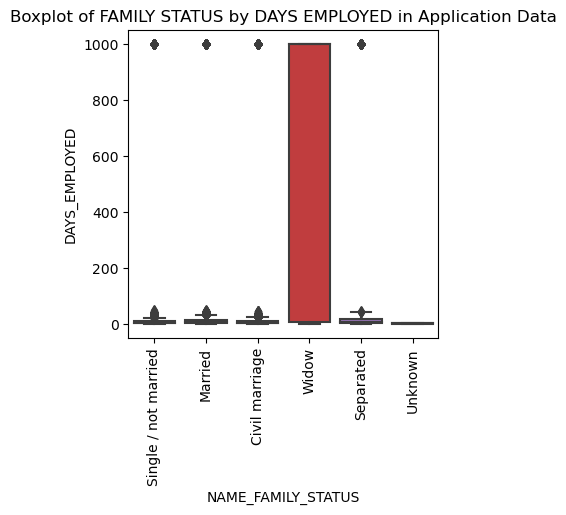

In [248]:
#boxplot for 'NAME_FAMILY_STATUS v/s DAYS_EMPLOYED

plt.figure(figsize=(4, 4))
sns.boxplot(x='NAME_FAMILY_STATUS', y='DAYS_EMPLOYED', data= selected_application_data)
plt.title('Boxplot of FAMILY STATUS by DAYS EMPLOYED in Application Data')
plt.xticks(rotation=90)
plt.show()
#comments: here it tell us that people wh o are married/single have different work histories and jon stablity.

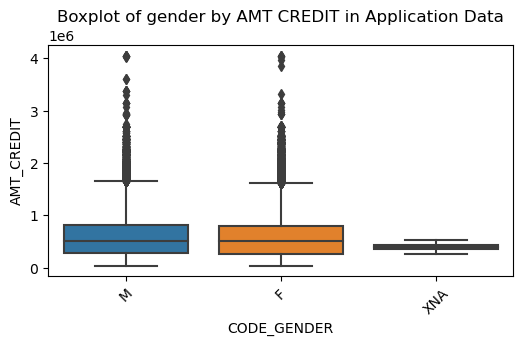

In [249]:
#boxplot for CODE_GENDER v/s AMT_CREDIT:

plt.figure(figsize=(6, 3))
sns.boxplot(x='CODE_GENDER', y='AMT_CREDIT', data= selected_application_data)
plt.title('Boxplot of gender by AMT CREDIT in Application Data')
plt.xticks(rotation=45)
plt.show()

#comments: here we can see that male and female are borrowing almost equal amount except in few cases.

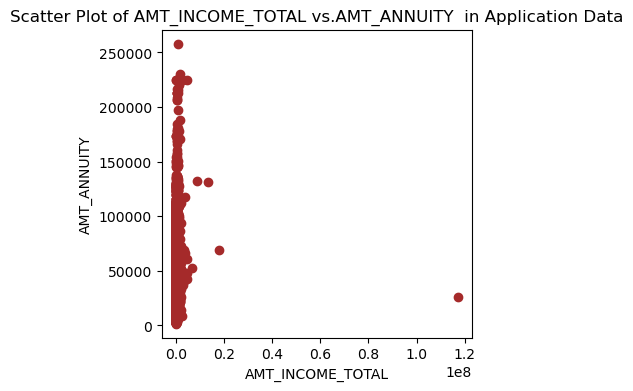

In [250]:
#scatterplots for AMT_INCOME_TOTAL v/s AMT_ANNUITY

plt.figure(figsize=(4, 4))
plt.scatter(selected_application_data['AMT_INCOME_TOTAL'], selected_application_data['AMT_ANNUITY'],color = "brown")
plt.title('Scatter Plot of AMT_INCOME_TOTAL vs.AMT_ANNUITY  in Application Data')
plt.xlabel('AMT_INCOME_TOTAL')
plt.ylabel('AMT_ANNUITY')
plt.show()
# it shows that if people with higher income can pay high amount of installments then bank can modify the payement settings as per income.

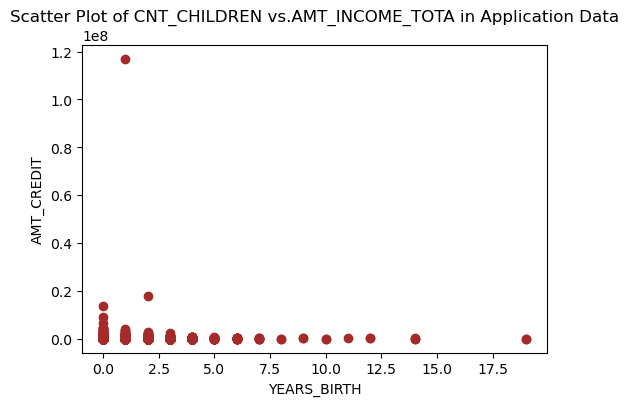

In [251]:
#scatterplot for CNT_CHILDREN v/s AMT_INCOME_TOTAL:

plt.figure(figsize=(6, 4))
plt.scatter(selected_application_data['CNT_CHILDREN'], selected_application_data['AMT_INCOME_TOTAL'],color="brown")
plt.title('Scatter Plot of CNT_CHILDREN vs.AMT_INCOME_TOTA in Application Data')
plt.xlabel('YEARS_BIRTH')
plt.ylabel('AMT_CREDIT')
plt.show()

# it show that with more children if person is earning less money - he/she is unable to repay loan

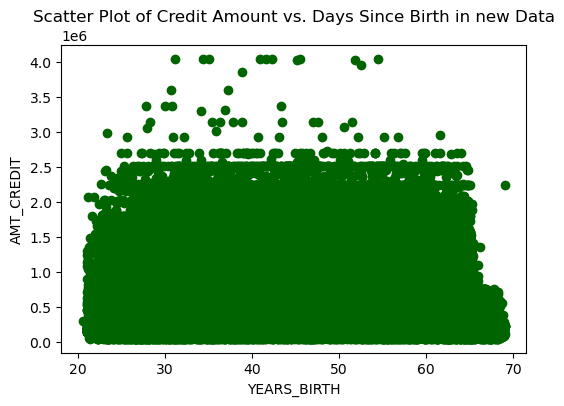

In [221]:
#scatterplot for YEARS_BIRTH v/s AMT_CREDIT

plt.figure(figsize=(6, 4))
plt.scatter(selected_application_data['YEARS_BIRTH'], selected_application_data['AMT_CREDIT'], color="darkgreen")
plt.title('Scatter Plot of Credit Amount vs. Days Since Birth in new Data')
plt.xlabel('YEARS_BIRTH')
plt.ylabel('AMT_CREDIT')
plt.show()

#comments: here we can observe that there's a relation between age and credit amount (e.g., higher credit amounts for middle-aged clients).

# PREVIOUS APPLICATION DATA😯

In [252]:
#read the data set of "previous application data" in application_data:
pre_application_data = pd.read_csv("previous_application EDA.csv ")

In [253]:
#print the head of the data frame:
pre_application_data.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START  ... NAME_SELLER_INDUSTRY  CNT_PAYMENT  \
0                       15  ...         Connectivity         12.0   
1                       11  ...                  XNA         36.0   
2                       11  ...                  XNA         12.0   
3                        7  ...                  XNA         12.0   
4                        9  ...                  XNA         24.0   

   NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0            middle  POS mobile with interest            365243.0   
1        low_action          Cash X-Sell: low            365243.0   
2              high         Cash X-Sell: high            365243.0   
3            middle       Cash X-Sell: middle            365243.0   
4              high         Cash Street: high                 NaN   

  DAYS_FIRST_DUE DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE DAYS_TERMINATION  \
0          -42.0                     300.0          -42.0            -37.0   
1         -134.0                     916.0       365243.0         365243.0   
2         -271.0                      59.0       365243.0         365243.0   
3         -482.0                    -152.0         -182.0           -177.0   
4            NaN                       NaN            NaN              NaN   

  NFLAG_INSURED_ON_APPROVAL  
0                       0.0  
1                       1.0  
2                       1.0  
3                       1.0  
4                       NaN  

[5 rows x 37 columns]

In [254]:
#print the shape of the data to get to know the number of rows and columns.
pre_application_data.shape

(1670214, 37)

In [255]:
# data cleaning:
# find the percentage of null values and then drop the columns that has null percentage more than 30:
pre_application_data_null = pre_application_data.isnull().mean()*100

In [256]:
#selecting the columns to be dropped from the previous application data which is more than 30 percentage:

dropped_pre_application_data = pre_application_data_null[pre_application_data_null>30].index #.index will fetch the columns names with more than 30% of null values.


In [257]:
pre_application_data = pre_application_data.drop(columns=dropped_pre_application_data)
pre_application_data.columns # print the columns of previous application 

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION',
       'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION'],
      dtype='object')

In [258]:
# Separating numerical and categorical columns in previous application data

# Identify the numerical columns
num_pre_application_data = pre_application_data.select_dtypes(include=['float64', 'int64']).columns

# Identify the categorical columns
cat_pre_application_data = pre_application_data.select_dtypes(include=['object']).columns

num_pre_application_data ,cat_pre_application_data # print the columns


(Index(['SK_ID_PREV', 'SK_ID_CURR', 'AMT_ANNUITY', 'AMT_APPLICATION',
        'AMT_CREDIT', 'AMT_GOODS_PRICE', 'HOUR_APPR_PROCESS_START',
        'NFLAG_LAST_APPL_IN_DAY', 'DAYS_DECISION', 'SELLERPLACE_AREA',
        'CNT_PAYMENT'],
       dtype='object'),
 Index(['NAME_CONTRACT_TYPE', 'WEEKDAY_APPR_PROCESS_START',
        'FLAG_LAST_APPL_PER_CONTRACT', 'NAME_CASH_LOAN_PURPOSE',
        'NAME_CONTRACT_STATUS', 'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON',
        'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO',
        'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE', 'NAME_SELLER_INDUSTRY',
        'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION'],
       dtype='object'))

In [259]:
pre_application_data.shape

(1670214, 26)

In [260]:
# Selecting columns for the previous_application_data for further analysis (including "SK_ID_CURR"):
cols_pre_application_data = [
    'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT',
    'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'CODE_REJECT_REASON', 'NAME_CLIENT_TYPE',
    'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE','CNT_PAYMENT',
    'PRODUCT_COMBINATION','NAME_CASH_LOAN_PURPOSE','NAME_PAYMENT_TYPE'
]

In [261]:
# Creating new data frames with the selected columns:

selected_pre_application_data = pre_application_data[cols_pre_application_data]

In [262]:
#verify the number of columns in new data frame:
selected_pre_application_data.shape

(1670214, 17)

In [263]:
selected_pre_application_data.columns

Index(['SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY', 'AMT_APPLICATION',
       'AMT_CREDIT', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION',
       'CODE_REJECT_REASON', 'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY',
       'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE', 'CNT_PAYMENT',
       'PRODUCT_COMBINATION', 'NAME_CASH_LOAN_PURPOSE', 'NAME_PAYMENT_TYPE'],
      dtype='object')

In [264]:
# Segmenting the selected columns into categorical and numerical columns:

cat_pre_application_data = selected_pre_application_data.select_dtypes(include=['object']).columns.tolist()
num_pre_application_data = selected_pre_application_data.select_dtypes(include=['float64', 'int64']).columns.tolist()

In [265]:
#print the categorical columns:
cat_pre_application_data 

['NAME_CONTRACT_TYPE',
 'NAME_CONTRACT_STATUS',
 'CODE_REJECT_REASON',
 'NAME_CLIENT_TYPE',
 'NAME_GOODS_CATEGORY',
 'NAME_PORTFOLIO',
 'NAME_PRODUCT_TYPE',
 'CHANNEL_TYPE',
 'PRODUCT_COMBINATION',
 'NAME_CASH_LOAN_PURPOSE',
 'NAME_PAYMENT_TYPE']

In [266]:
#print the numerical columns:
num_pre_application_data

['SK_ID_CURR',
 'AMT_ANNUITY',
 'AMT_APPLICATION',
 'AMT_CREDIT',
 'DAYS_DECISION',
 'CNT_PAYMENT']

In [ ]:
#reasons of selecting these columns from Previous Application Data:
#Categorical Columns:

Categorical Columns:
"NAME_CONTRACT_TYPE": Understanding previous loan types helps to understand client preferences and risks.
"NAME_CONTRACT_STATUS": Previous loan statuses can give us insights in past loan performance.
"CODE_REJECT_REASON": Knowing why loans were rejected can help in risk assessment.
"NAME_CLIENT_TYPE", "NAME_GOODS_CATEGORY", "NAME_PORTFOLIO", "NAME_PRODUCT_TYPE", "CHANNEL_TYPE", "NAME_YIELD_GROUP": These give 
    detailed insights into the  previous loans, products, channels, and yields, helping in understanding 
    the client's past interactions.
    
    
#Numerical Columns:
    
"AMT_ANNUITY", "AMT_APPLICATION", "AMT_CREDIT": Past financial records are important in analyzing the client's financial behavior.
'DAYS_DECISION' number of days took by the bank to approve a loan.
'CNT_PAYMENT' shows number of installments offerd by banks. if it is more people are most likely to take loans.

In [267]:
# let's convert DAYS_DECISION values into positive with pandas .abs method:

selected_pre_application_data['DAYS_DECISION'] = selected_pre_application_data['DAYS_DECISION'].abs()


# UNIVARIATE ANALYSIS (PREVIOUS APPLICATION DATA)🤞

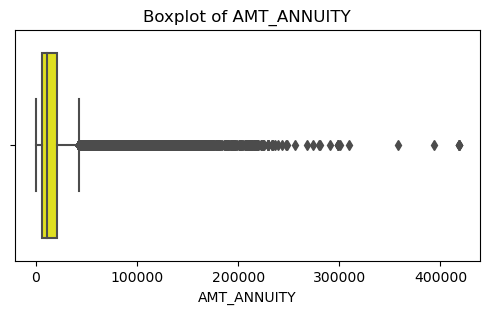

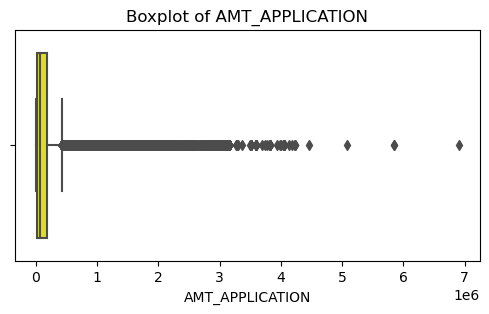

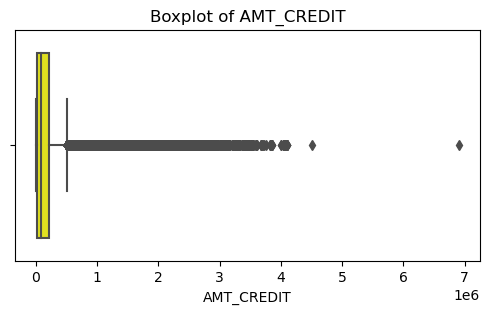

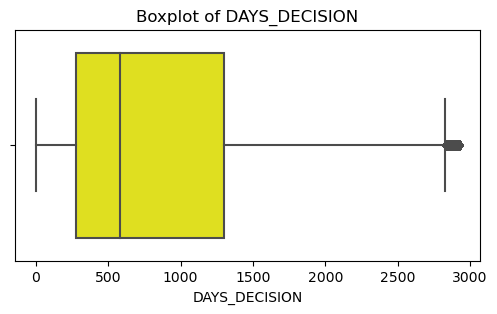

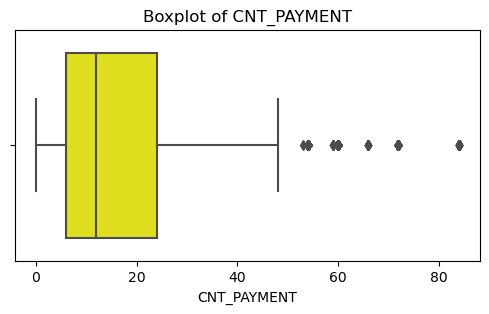

In [268]:
# List of numerical columns to analyze in previous application data
num_prev_application = ['AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT','DAYS_DECISION','CNT_PAYMENT']

# Loop through the numerical columns for previous_application_data
for i in num_prev_application:
    plt.figure(figsize=(6, 3))
    sns.boxplot(x=selected_pre_application_data[i],color="yellow")
    plt.title('Boxplot of ' + i)
    plt.show()

In [ ]:
#inferences drawn from the selected previous application data (outliers):

1.'AMT_ANNUITY' outliers in annuity amounts shows different loan structures, like very large loans/special loan.
               High annuity is be related with rich clients.
    
2.'AMT_APPLICATION' Outliers indicates rare large or small numbers of applications, tha shows the needs of the clients
3.'AMT_CREDIT' this will help us to know how much credit was granted.
4.'DAYS_DECISION' if some clients take longer time to decide, it may indicate complications in the assessment. 
5.'CNT_PAYMENT'here we can see that bank is not offering loan for large number of installments except few rare cases

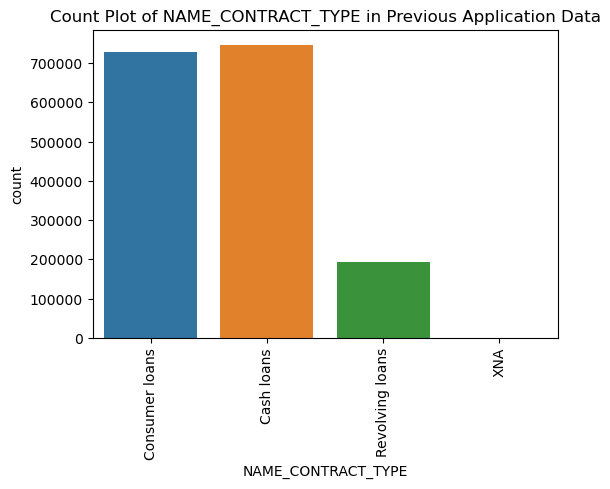

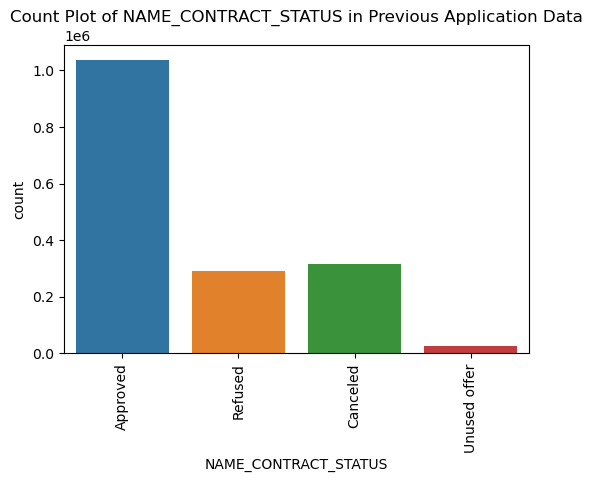

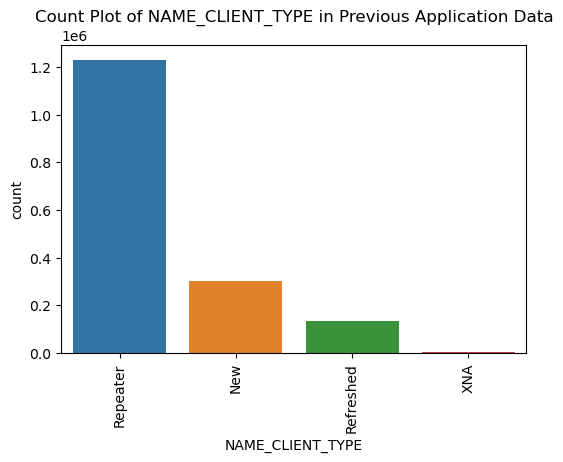

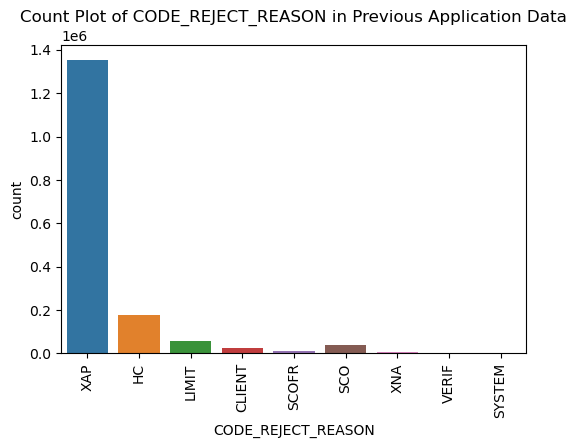

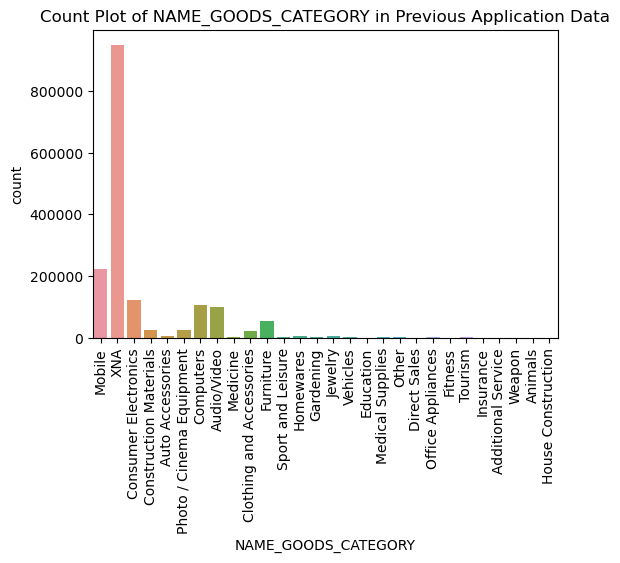

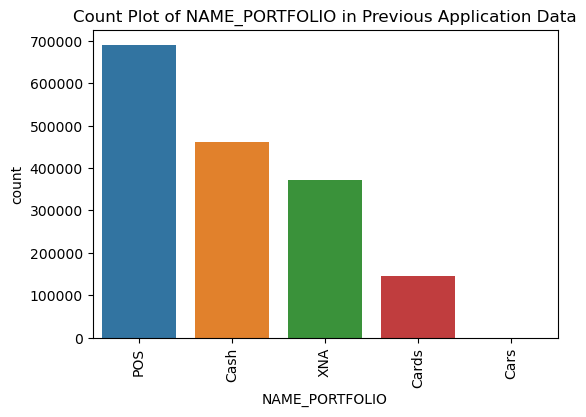

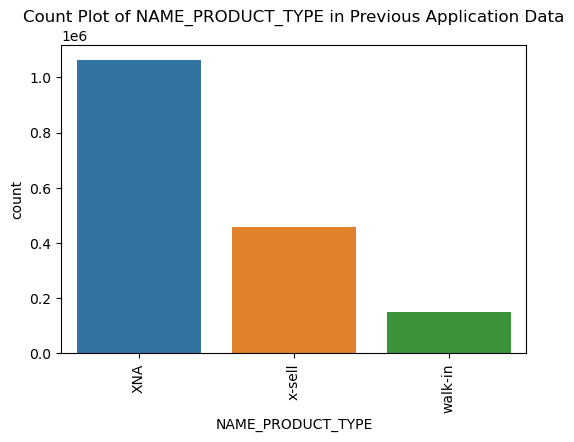

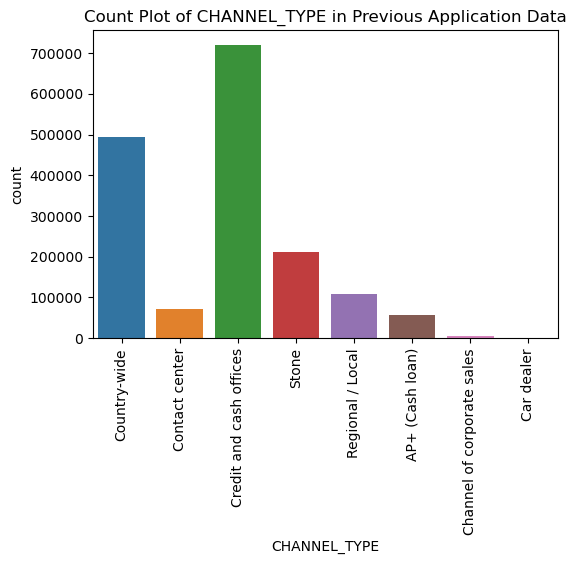

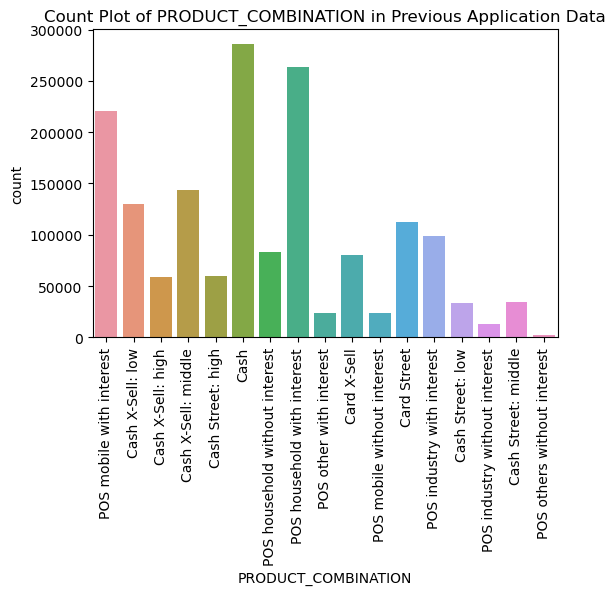

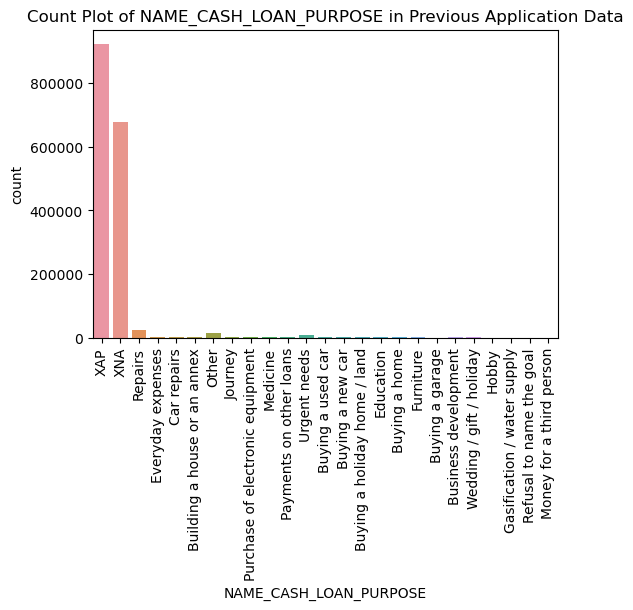

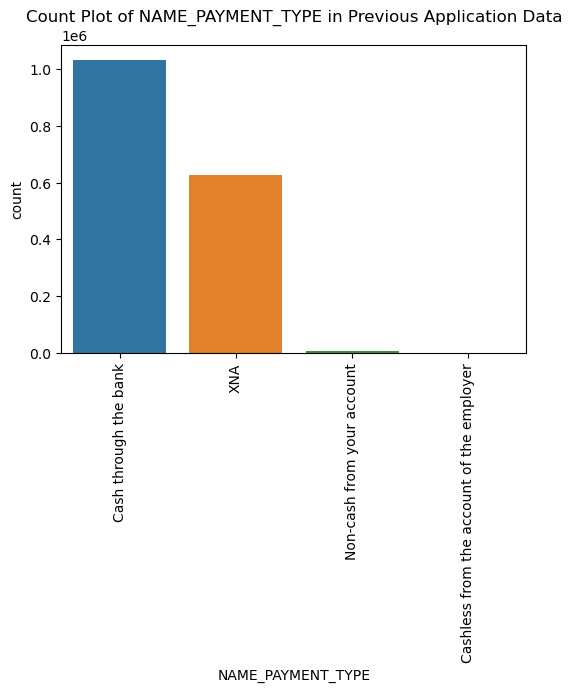

In [269]:
# List of categorical columns to analyze in previous application data

cat_prev_application = ['NAME_CONTRACT_TYPE', 'NAME_CONTRACT_STATUS', 'NAME_CLIENT_TYPE','CODE_REJECT_REASON','NAME_GOODS_CATEGORY','NAME_PORTFOLIO','NAME_PRODUCT_TYPE','CHANNEL_TYPE','PRODUCT_COMBINATION','NAME_CASH_LOAN_PURPOSE','NAME_PAYMENT_TYPE']

# Plotting count plots for each categorical column in previous application data

for i in cat_prev_application:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=i, data=selected_pre_application_data)
    plt.title(f"Count Plot of {i} in Previous Application Data") # f" this will allow to print the string and the column name inside{}
    plt.xticks(rotation=90) # it will rotate variables on x- axis to 45 degrees.
    plt.show()

In [ ]:
#inferences drawn from the above visualizations are:
1.'NAME_CONTRACT_TYPE' this shows that the consumer loans and cash loans are more common.
2.'NAME_CONTRACT_STATUS'proportion of approved is more than refused contracts, that indicates the lending of loan.
3.'NAME_CLIENT_TYPE' Different types of clients have different behavior patterns. For example, repeat clients may have a history of repayements timely, which  we cannot say about the new clients.
4.'CODE_REJECT_REASON' XAP,HC,LIMIT and SCO are some of the main reasons of getting loan rejected.
5.'NAME_GOODS_CATEGORY' XNA, MOBILE, CONSUMER ELECTRONICS, COMPUTERS, FURNITURES are some of the main goods for which people are borrowing loans.
6.'NAME_PORTFOLIO'it show what people are preferring more to pay loans, this will help banks to make modifications.
7.'NAME_PRODUCT_TYPE' this shows in which product type clients are interested (XNA,X-SELL)
8.'CHANNEL_TYPE' this can help the bank to reach out to clients as a channel like- country wide, credit and cash offices.
9.'PRODUCT_COMBINATION' show most popular product combinations taken by clients can help banks to provide such more offers.
10.'NAME_CASH_LOAN_PURPOSE' this could help banks to provide more offers according to the purpose of the loans.



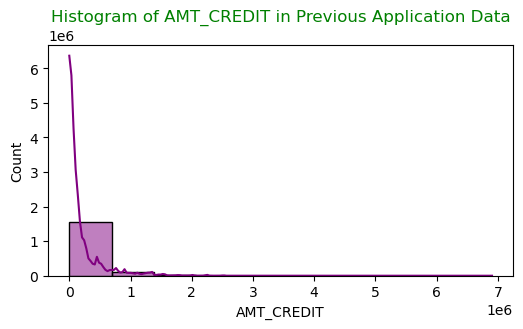

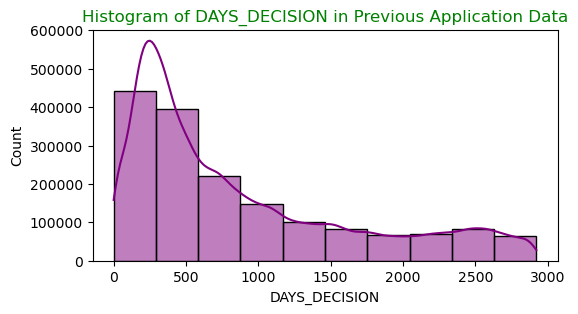

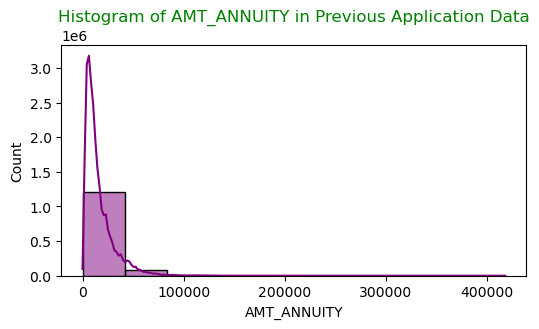

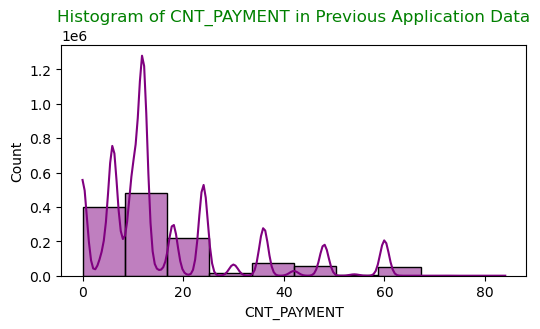

In [270]:
# List of numerical columns to analyze in previous application data
numerical_prev_application = ['AMT_CREDIT', 'DAYS_DECISION','AMT_ANNUITY','CNT_PAYMENT']

# Plotting histograms for each numerical column in previous application data
for i in numerical_prev_application:
    plt.figure(figsize=(6, 3))
    sns.histplot(selected_pre_application_data[i], bins=10, kde=True, color = "purple")
    plt.title(f"Histogram of {i} in Previous Application Data",color = "green")
    plt.show()

In [ ]:
# inferences drawn from the above visualizations:
1.'AMT_CREDIT' showsthe most common credit amounts that clients apply for or receive.
2.'DAYS_DECISION' indicates the  timelines for loan decisions, which can reflect the efficiency of the lending process.
3.'AMT_ANNUITY'distribution of annuity amounts  provides information of repayment behaviour such as defaults or early repayments.
4.'CNT_PAYMENT'This shows that people want short term loans so banks can provide more such offers in future.

# BIVARIATE ANALYSIS (PREVIOUS APPLICATION DATA)✌️

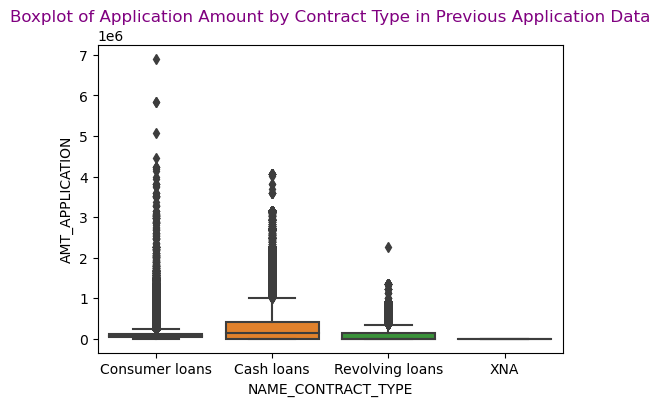

In [271]:
#Boxplot ( NAME_CONTRACT_TYPE v/s AMT_APPLICATION):

plt.figure(figsize=(6, 4))
sns.boxplot(x='NAME_CONTRACT_TYPE', y='AMT_APPLICATION', data= selected_pre_application_data)
plt.title('Boxplot of Application Amount by Contract Type in Previous Application Data', color = "purple")
plt.show()

#comments:certain applications requested unusually high amounts(consumer loans, cash loans) or low amounts (revolving loans).


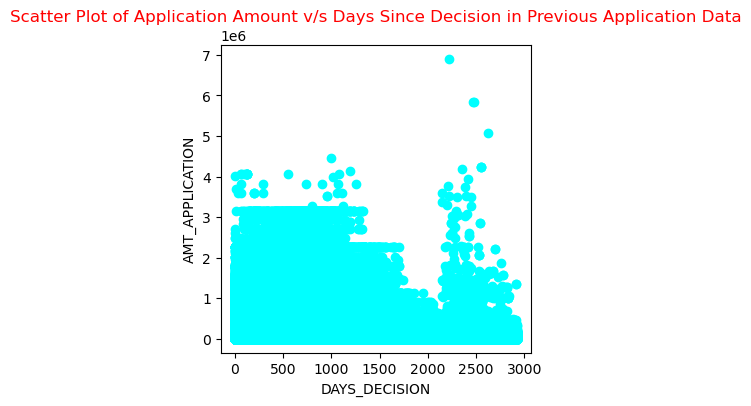

In [272]:
# Scatter Plot ( DAYS_DECISION v/s AMT_APPLICATION):
plt.figure(figsize=(4, 4))
plt.scatter(selected_pre_application_data['DAYS_DECISION'], selected_pre_application_data['AMT_APPLICATION'],color="cyan")
plt.title('Scatter Plot of Application Amount v/s Days Since Decision in Previous Application Data', color = "red")
plt.xlabel('DAYS_DECISION')
plt.ylabel('AMT_APPLICATION')
plt.show()

#comments: there is a correlation between decision timing and loan amount the  larger loans taking longer days to decide. As it is obvious that bank will take more time in verifying clients economic status to give large amount of loan.

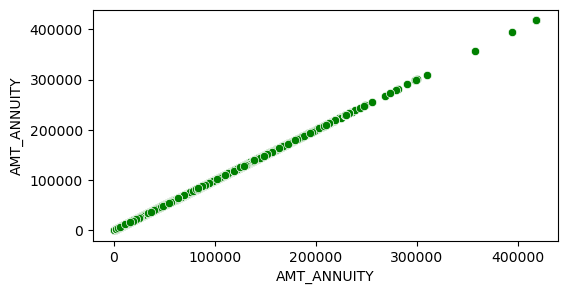

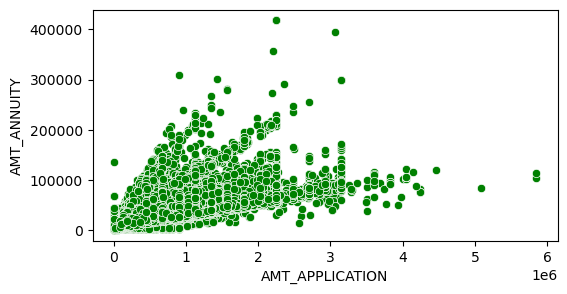

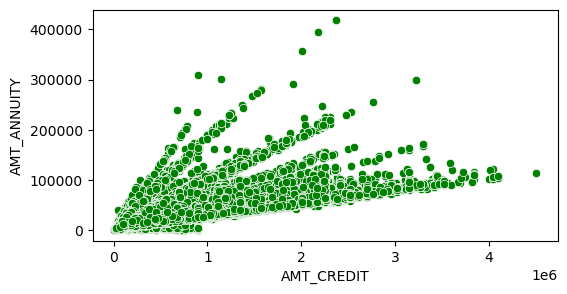

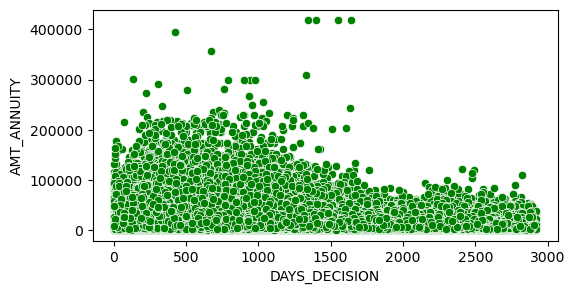

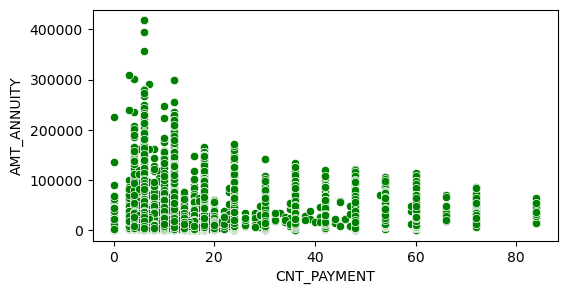

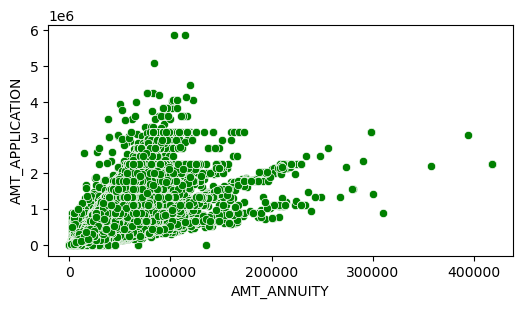

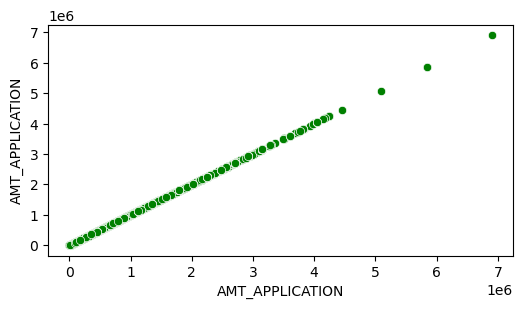

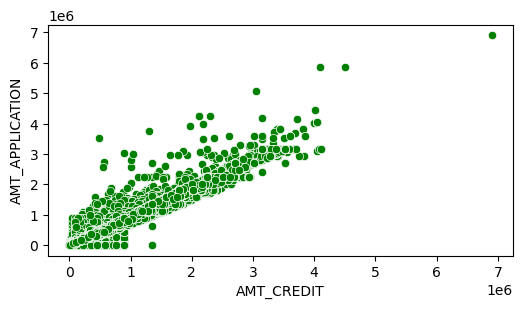

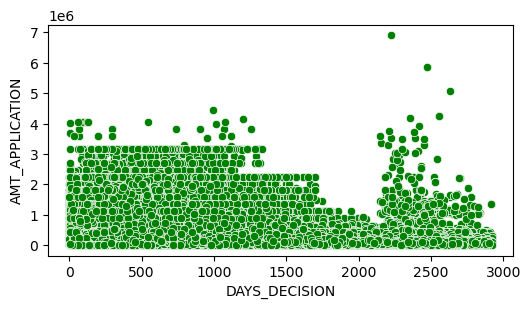

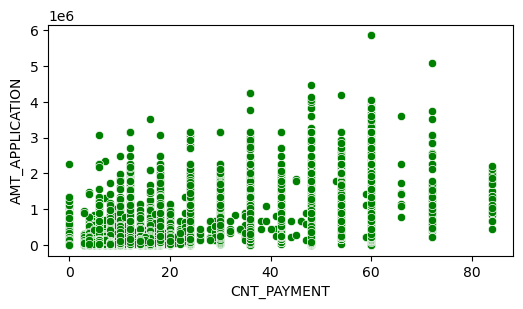

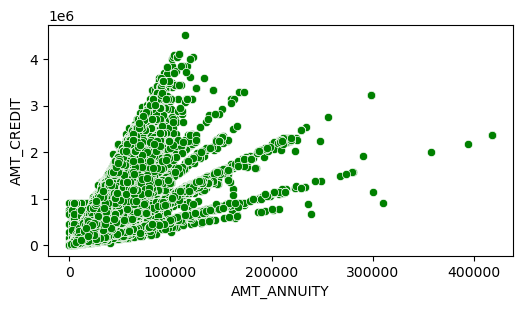

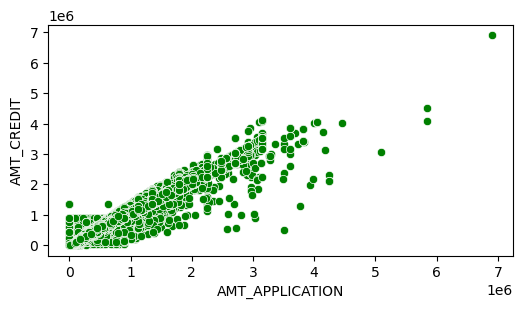

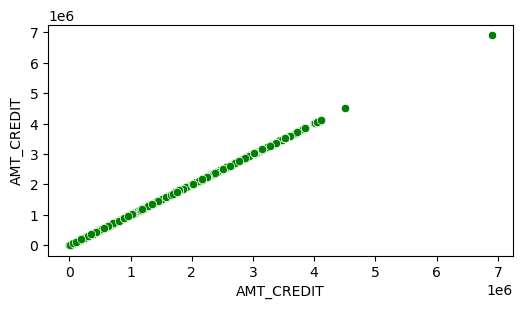

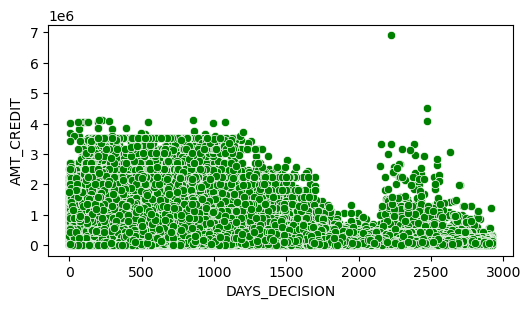

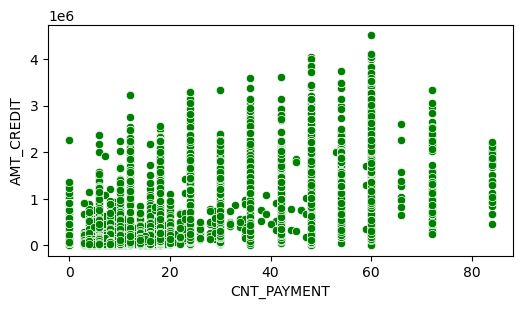

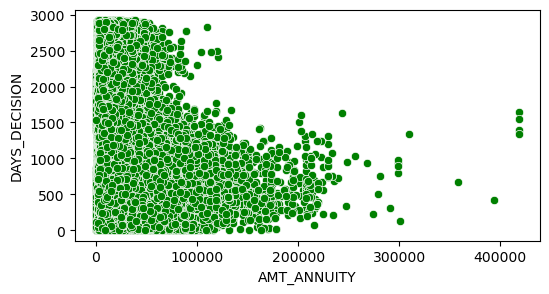

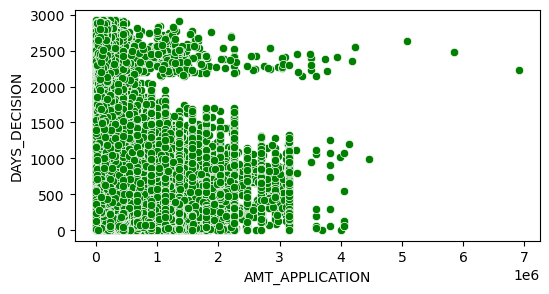

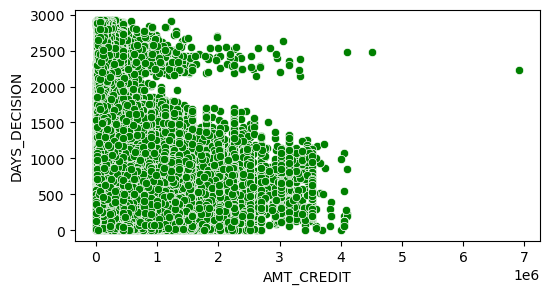

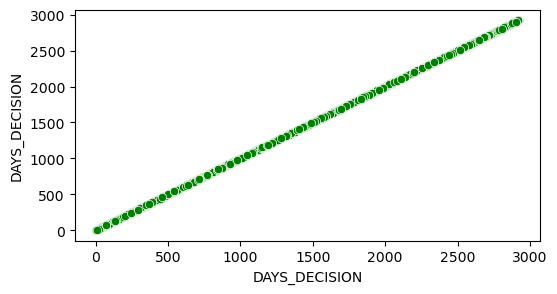

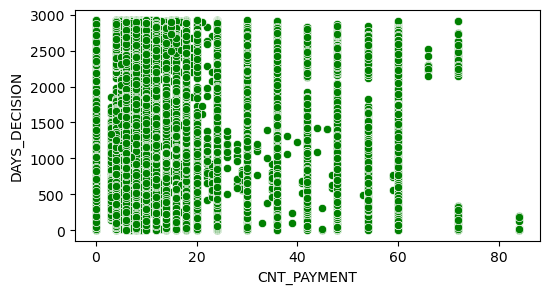

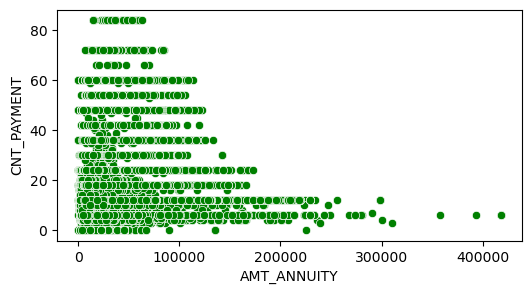

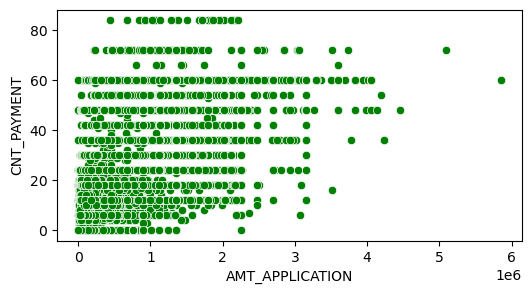

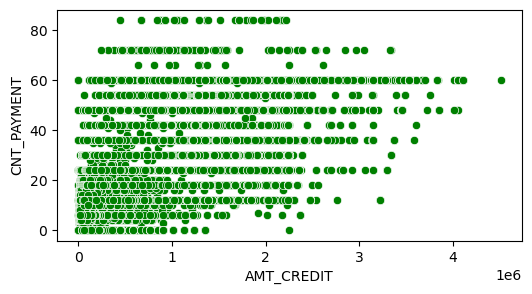

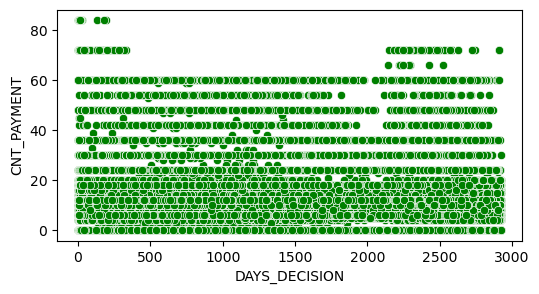

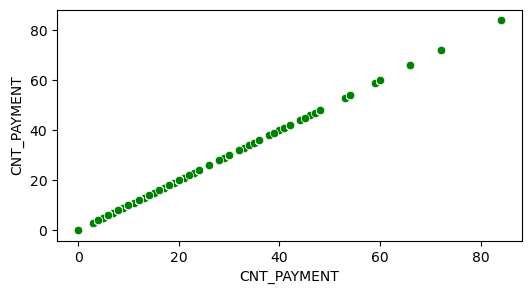

In [273]:
#plot scatterplot for all numerical variables to know th erelationship between them

num_prev_application = ['AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT','DAYS_DECISION','CNT_PAYMENT']
for i in num_prev_application:
    for j in num_prev_application:
        plt.figure(figsize=(6, 3))
        sns.scatterplot(x =selected_pre_application_data[j],y =selected_pre_application_data[i], color = ["green"])
        plt.show()
        
#comments:As for this code scatter plot is being formed for every combinations of varibales present in num_prev_application which includes the variables itself. this leads to repitition and such graphs do not provide any insights.



In [ ]:
# inferences drawn from the above visualizations:
1.'AMT_ANNUITY vs. AMT_APPLICATION': here we can observe more loan applications leads to more amount of loan installments.
2.'AMT_ANNUITY vs. AMT_CREDIT': this shows how the installments amount is increasing along with the increase in credit amount.
3.'AMT_ANNUITY vs. DAYS_DECISION':in this we can observe that longer days for decision leads to lesser amount of installments, which is reverse as compared to bank scenarios.
4.'AMT_ANNUITY vs. CNT_PAYMENT': this shows lesser the number of payements more the installment amount.
5.'AMT_APPLICATION vs. AMT_CREDIT':here we can observe a straight line that indicates that the client has got the loan amount has asked for in the application, but there are few caes where we can say that client has not got the desired amount that they have stated in their application have got less amount.
6.'AMT_APPLICATION vs. DAYS_DECISION': in this we can see clients have got larger loans in lesser days except few cases. this may create problem as one should take more days before granting loans for larger amounts.
7.'AMT_APPLICATION vs. CNT_PAYMENT':there is no clear pattern as in some cases samller amounts are paid inlesser installments where as in some cases small maounts were being paid in larger installments. this indicates installments are based on several other factors.


# MERGING DATA SETS 😯

In [274]:
# Merging the two data frames(application data and previous application data) on the "SK_ID_CURR" column:
new_data = pd.merge(selected_application_data, selected_pre_application_data, on='SK_ID_CURR', how='inner')

# let's see few rows of the merged data frame:
new_data.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE_x CODE_GENDER FLAG_OWN_CAR  \
0      100002       1           Cash loans           M            N   
1      100003       0           Cash loans           F            N   
2      100003       0           Cash loans           F            N   
3      100003       0           Cash loans           F            N   
4      100004       0      Revolving loans           M            Y   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_x  \
0               Y             0          202500.0      406597.5   
1               N             0          270000.0     1293502.5   
2               N             0          270000.0     1293502.5   
3               N             0          270000.0     1293502.5   
4               Y             0           67500.0      135000.0   

   AMT_ANNUITY_x  ... CODE_REJECT_REASON NAME_CLIENT_TYPE  \
0        24700.5  ...                XAP              New   
1        35698.5  ...                XAP         Repeater   
2        35698.5  ...                XAP        Refreshed   
3        35698.5  ...                XAP        Refreshed   
4         6750.0  ...                XAP              New   

    NAME_GOODS_CATEGORY  NAME_PORTFOLIO  NAME_PRODUCT_TYPE  \
0              Vehicles             POS                XNA   
1                   XNA            Cash             x-sell   
2             Furniture             POS                XNA   
3  Consumer Electronics             POS                XNA   
4                Mobile             POS                XNA   

              CHANNEL_TYPE  CNT_PAYMENT          PRODUCT_COMBINATION  \
0                    Stone         24.0      POS other with interest   
1  Credit and cash offices         12.0             Cash X-Sell: low   
2                    Stone          6.0   POS industry with interest   
3             Country-wide         12.0  POS household with interest   
4         Regional / Local          4.0  POS mobile without interest   

   NAME_CASH_LOAN_PURPOSE      NAME_PAYMENT_TYPE  
0                     XAP                    XNA  
1                     XNA                    XNA  
2                     XAP  Cash through the bank  
3                     XAP  Cash through the bank  
4                     XAP  Cash through the bank  

[5 rows x 40 columns]

In [61]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1413701 entries, 0 to 1413700
Data columns (total 40 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   SK_ID_CURR                  1413701 non-null  int64  
 1   TARGET                      1413701 non-null  int64  
 2   NAME_CONTRACT_TYPE_x        1413701 non-null  object 
 3   CODE_GENDER                 1413701 non-null  object 
 4   FLAG_OWN_CAR                1413701 non-null  object 
 5   FLAG_OWN_REALTY             1413701 non-null  object 
 6   CNT_CHILDREN                1413701 non-null  int64  
 7   AMT_INCOME_TOTAL            1413701 non-null  float64
 8   AMT_CREDIT_x                1413701 non-null  float64
 9   AMT_ANNUITY_x               1413701 non-null  float64
 10  NAME_INCOME_TYPE            1413701 non-null  object 
 11  NAME_EDUCATION_TYPE         1413701 non-null  object 
 12  NAME_FAMILY_STATUS          1413701 non-null  object 
 1

In [275]:
#separating categorical and numerical columns from new data;
cat_new_data = new_data.select_dtypes(include=['object']).columns.tolist()
num_new_data = new_data.select_dtypes(include=['float64', 'int64']).columns.tolist()

In [276]:
cat_new_data #list of categorical columns

['NAME_CONTRACT_TYPE_x',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'OCCUPATION_TYPE',
 'NAME_CONTRACT_TYPE_y',
 'NAME_CONTRACT_STATUS',
 'CODE_REJECT_REASON',
 'NAME_CLIENT_TYPE',
 'NAME_GOODS_CATEGORY',
 'NAME_PORTFOLIO',
 'NAME_PRODUCT_TYPE',
 'CHANNEL_TYPE',
 'PRODUCT_COMBINATION',
 'NAME_CASH_LOAN_PURPOSE',
 'NAME_PAYMENT_TYPE']

In [277]:
num_new_data #list of numerical columns

['SK_ID_CURR',
 'TARGET',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT_x',
 'AMT_ANNUITY_x',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'CNT_FAM_MEMBERS',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'AMT_REQ_CREDIT_BUREAU_YEAR',
 'AMT_CREDIT_INR',
 'YEARS_BIRTH',
 'AMT_ANNUITY_y',
 'AMT_APPLICATION',
 'AMT_CREDIT_y',
 'DAYS_DECISION',
 'CNT_PAYMENT']

# perform univariate analysis on new data:🛠️

CNT_CHILDREN


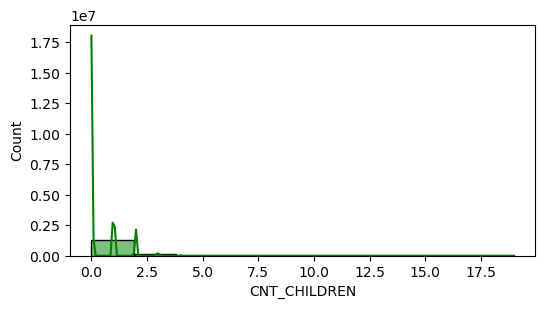

AMT_INCOME_TOTAL


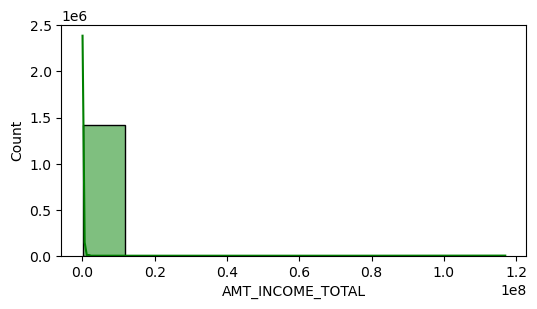

AMT_CREDIT_x


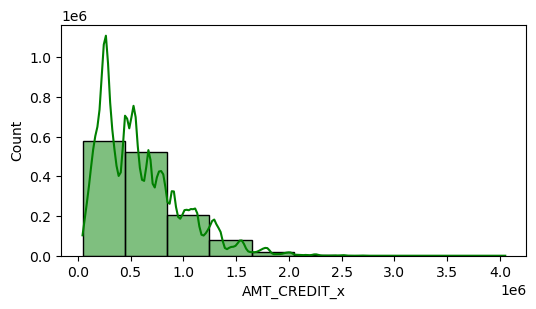

AMT_ANNUITY_x


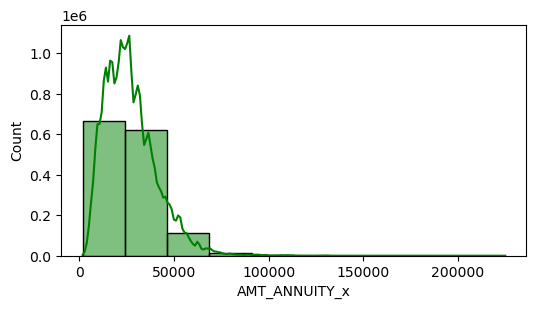

DAYS_EMPLOYED


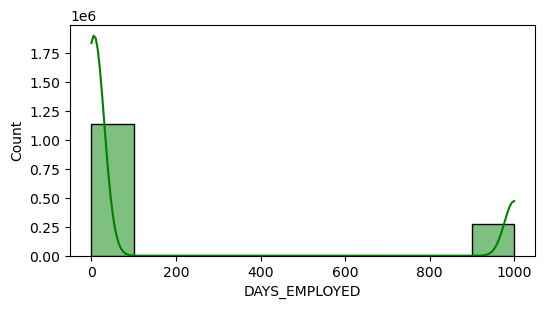

CNT_FAM_MEMBERS


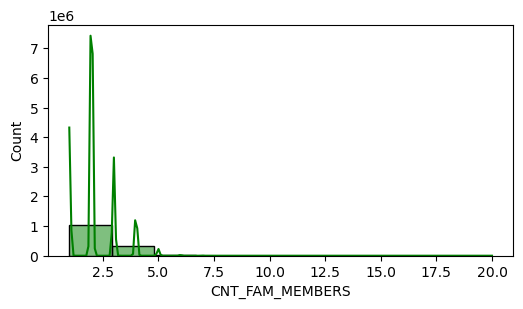

YEARS_BIRTH


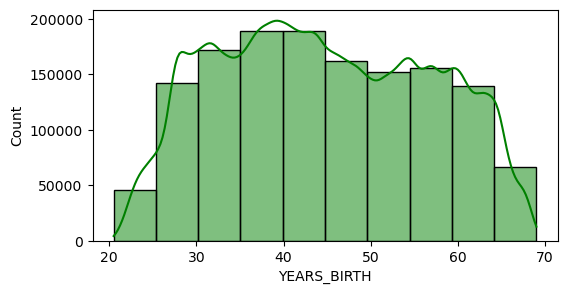

AMT_APPLICATION


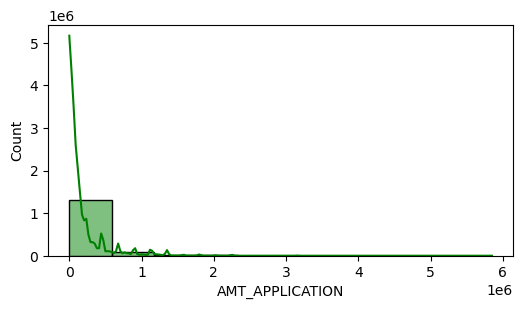

AMT_CREDIT_y


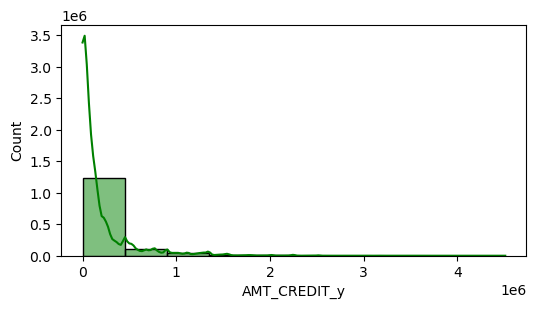

CNT_PAYMENT


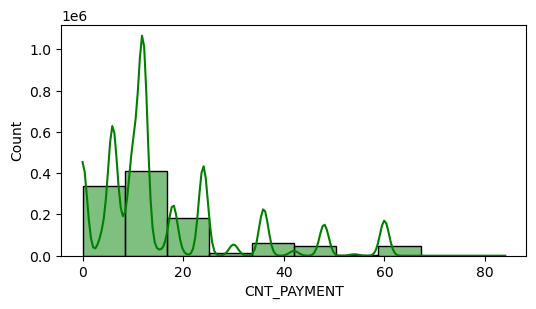

In [278]:
num_new_data=[
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT_x',
 'AMT_ANNUITY_x',
 'DAYS_EMPLOYED',
 'CNT_FAM_MEMBERS',
 'YEARS_BIRTH',
 'AMT_APPLICATION',
 'AMT_CREDIT_y',
 'CNT_PAYMENT']

# plot histplots for all numerical columns in new data:

for i in num_new_data:
    print(i)
    plt.figure(figsize=(6, 3))
    sns.histplot(new_data[i], bins = 10, kde = True, color="green")
    plt.show()


In [ ]:
#conclusion drawn from above visualizations:

'CNT_CHILDREN' show number of kids a client has, more kinds means more difficult to repay loan or vice- versa
'AMT_INCOME_TOTAL' show how much people earn, if they earn less then they are likely to become defaulters.
'AMT_CREDIT_x' shows loan amount of the clients, larger amount of loan will be risky for the banks.
'AMT_ANNUITY_x' show installments amount, lesser the installment becomes more easy to repay laon for the client
'DAYS_EMPLOYED' show more people are employed fro lesser number of days , makes them unstable to repay loan.
'CNT_FAM_MEMBERS' clients with few family members find it easy to repay loan.
'YEARS_BIRTH' middle aged people are more likely to get loans approved as with in increasing age repaying loan will be problematic.
'AMT_APPLICATION' shows very few people have got the amount of loan applied.
'AMT_CREDIT_y' show loan amount of the clients that they have asked in their previous application and few people have got what they have asked for.
'CNT_PAYMENT' shows number of payments as it has less installments that makes it difficult for people to repay loan.

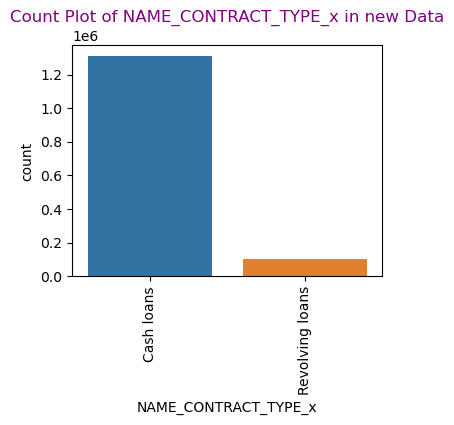

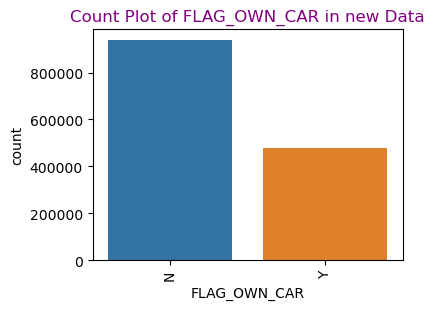

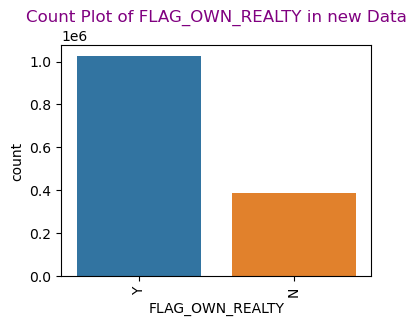

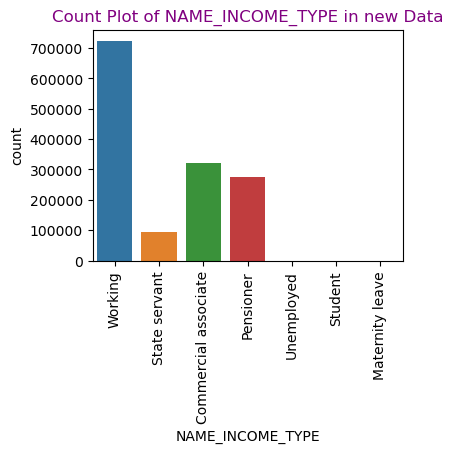

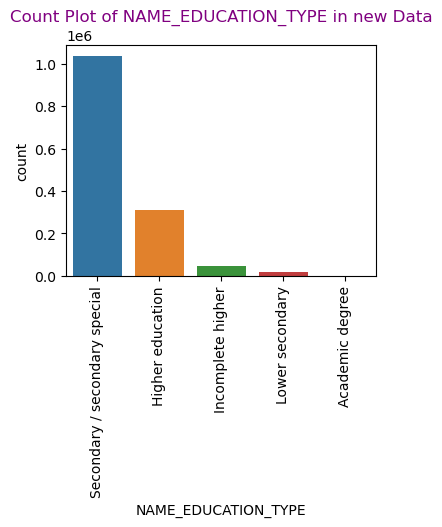

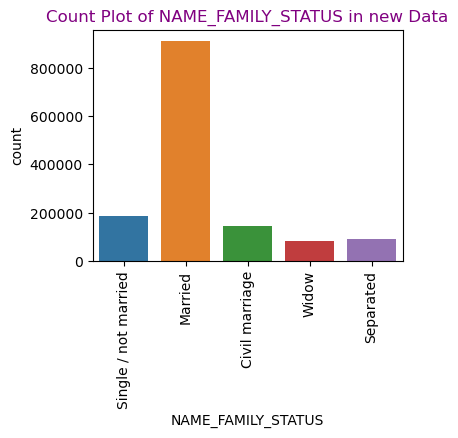

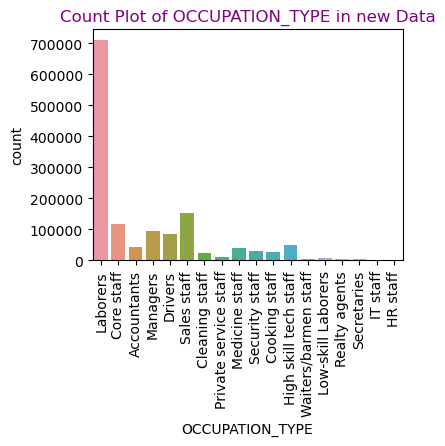

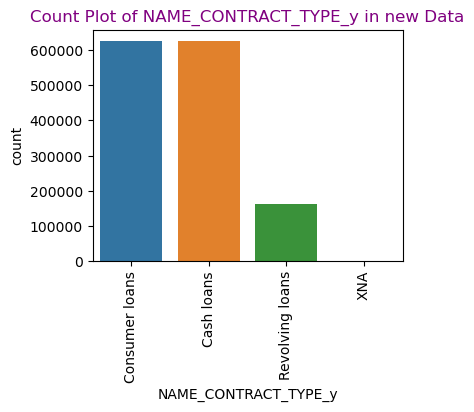

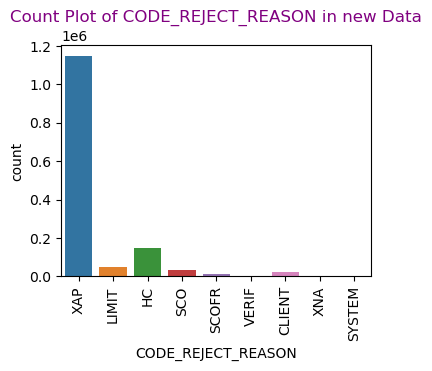

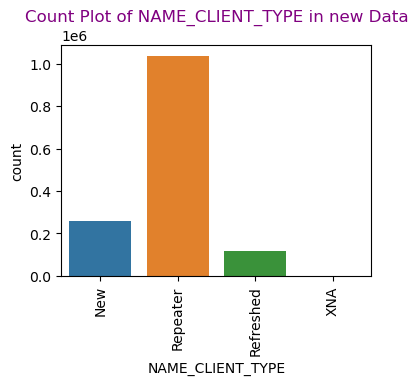

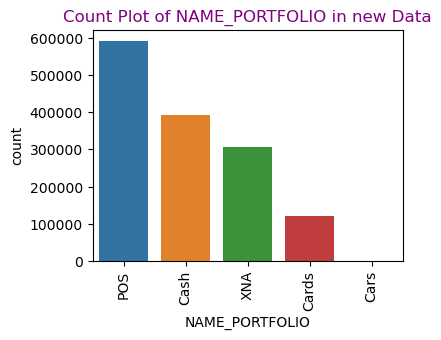

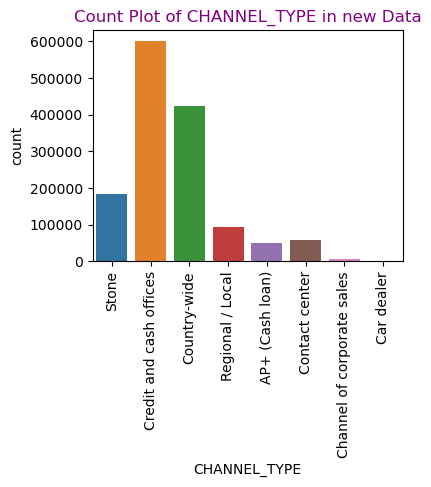

In [280]:
# List of categorical columns to analyze new data:

cat_new_data = ['NAME_CONTRACT_TYPE_x',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'OCCUPATION_TYPE',
 'NAME_CONTRACT_TYPE_y',
 'CODE_REJECT_REASON',
 'NAME_CLIENT_TYPE',
 'NAME_PORTFOLIO',
 'CHANNEL_TYPE'
 ]

# Plotting count plots for each categorical column in previous application data

for i in cat_new_data:
    plt.figure(figsize=(4,3))
    sns.countplot(x=i, data= new_data)
    plt.title(f"Count Plot of {i} in new Data",color = "purple") # f" this will allow to print the string and the column name inside{}
    plt.xticks(rotation=90) # it will rotate variables on x- axis to 90 degrees.
    plt.show()

In [ ]:
# colclusion sdrawn from above visualization:

'NAME_CONTRACT_TYPE_x' as there are more people with cah loans, if people with cash loans default it will be riskier.
'FLAG_OWN_CAR' people having car means they have money, if people without car defaults frequently then we can consider that they lack money.
'FLAG_OWN_REALTY' shows more people have home means they are rich , bank can lend loans to them.
'NAME_INCOME_TYPE'people working in reputed sectors, stable job can repay but if people with unstable jobs are defaulters then it may be risky.
'NAME_EDUCATION_TYPE'higher education means hig paying jobs lendin money to them is fine.
'NAME_FAMILY_STATUS'family status may play an important role as if a single parent is having problem in repaying then it may be consider.
'OCCUPATION_TYPE'people with low paying jobs may be riskier like labourers.
'NAME_CONTRACT_TYPE_y' if people with consumer loan and cash loan fails to pay previous loan then they may be riskier.
'CODE_REJECT_REASON'if many people are rejected for the similar reason like XAP,SCO,LIMIT then it could be reskier.
'NAME_CLIENT_TYPE' as there are more repeaters it is safer to lend them loans.
'NAME_PORTFOLIO' there could be reasons where these portfolios have defaults. it is to be checked carefully.
'CHANNEL_TYPE' som eof the channels like credit cash offices, country wide are better to get good clients.


# perform bivariate analysis on new data:🛠️

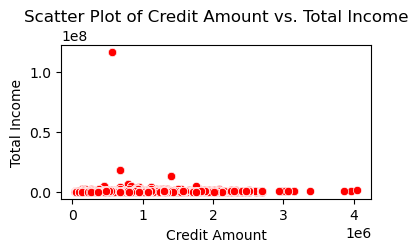

In [281]:
#Scatter Plot for AMT_CREDIT vs. AMT_INCOME_TOTAL:

plt.figure(figsize=(4,2))
sns.scatterplot(x='AMT_CREDIT_x', y='AMT_INCOME_TOTAL', data=new_data, color = "red")
plt.title('Scatter Plot of Credit Amount vs. Total Income')
plt.xlabel('Credit Amount')
plt.ylabel('Total Income')
plt.show()

#comments:here we need to observe whether people who are taking loan more even if they earn less. this could be risky for the bank.

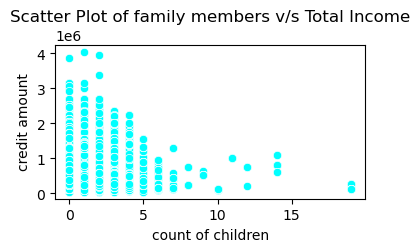

In [193]:
#Scatter Plot for CNT_CHILDREN  v/s AMT_CREDIT:


plt.figure(figsize=(4,2))
sns.scatterplot(x='CNT_CHILDREN', y='AMT_CREDIT_x', data=new_data, color="cyan")
plt.title('Scatter Plot of family members v/s Total Income')
plt.xlabel('count of children')
plt.ylabel('credit amount')
plt.show()

#comments: people with generally small family means lesser number of children are taking more loans.

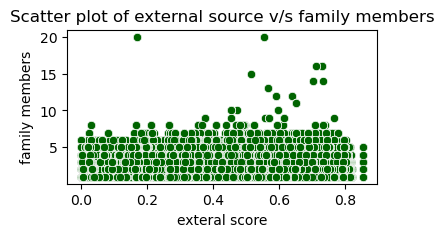

In [282]:
#Scatter Plot for EXT_SOURCE  v/s CNT_FAMILY_MEMBERS:
plt.figure(figsize=(4,2))
sns.scatterplot(x='EXT_SOURCE_2', y='CNT_FAM_MEMBERS', data=new_data, color="darkgreen")
plt.title( "Scatter plot of external source v/s family members")
plt.xlabel("exteral score")
plt.ylabel('family members')
plt.show()

#comments: here more the family menbers shows more credit score which shows a positive relation for getting the loan.

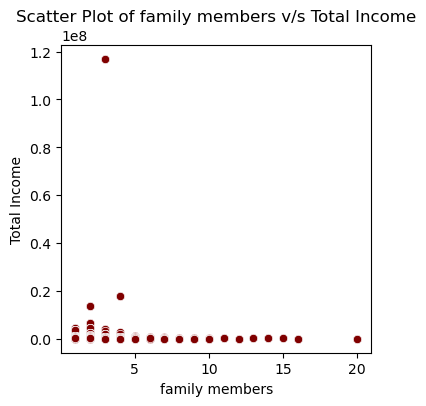

In [283]:
#Scatter Plot for CNT_FAM_MEMBERS  v/s AMT_INCOME_TOTAL:


plt.figure(figsize=(4,4))
sns.scatterplot(x='CNT_FAM_MEMBERS', y='AMT_INCOME_TOTAL', data=new_data, color="maroon")
plt.title('Scatter Plot of family members v/s Total Income')
plt.xlabel('family members')
plt.ylabel('Total Income')
plt.show()

#comments: here we can observe that people with lesser family members have high income as compared to people with more family members, from thi swe can refer that people wiht small family are likely to get appoval for the loans because of the stability and lesser expenses.

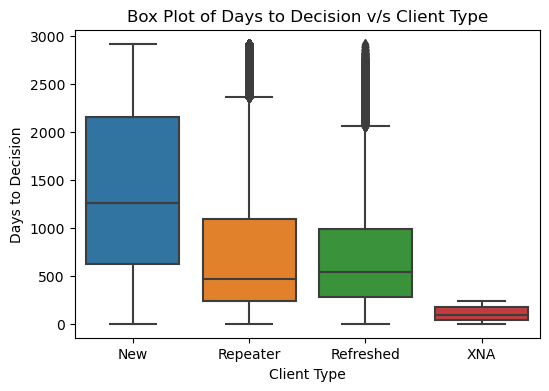

In [303]:
#Box Plot for DAYS_DECISION v/s NAME_CLIENT_TYPE:

plt.figure(figsize=(6, 4))
sns.boxplot(x='NAME_CLIENT_TYPE', y='DAYS_DECISION', data=new_data)
plt.title('Box Plot of Days to Decision v/s Client Type')
plt.xlabel('Client Type')
plt.ylabel('Days to Decision')
plt.show()

#comments: here we can observe that bank take lesser time to approve loans for the repeated clients as compared to the new clients, as they have the repayement history of the repeated clients.

# Check for Imbalance🤔

In [284]:
# checking the distribution of Target variable 

imbalance =new_data['TARGET'].value_counts()
print(imbalance)

0    1291341
1     122360
Name: TARGET, dtype: int64


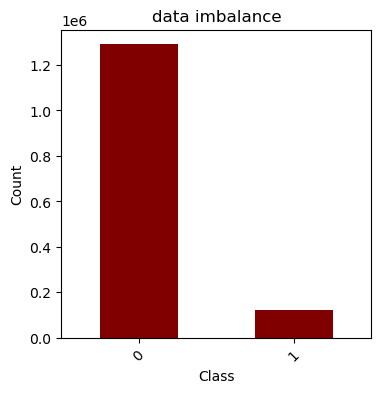

In [285]:
#show visualization of imbalanced data:
plt.figure(figsize=(4, 4))
imbalance.plot(kind='bar', title='data imbalance',color="maroon")
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [286]:
# Separating the data based on the TARGET for further analysis
data_1 = new_data[new_data['TARGET'] == 1] # shows client with payment difficulties
data_0 = new_data[new_data['TARGET'] == 0] # clients with no payment difficultie, other cases


In [287]:
# show the lenght of the two datas
L1= len(data_1)
L0= len(data_0)
print(L1)
print(L0)

122360
1291341


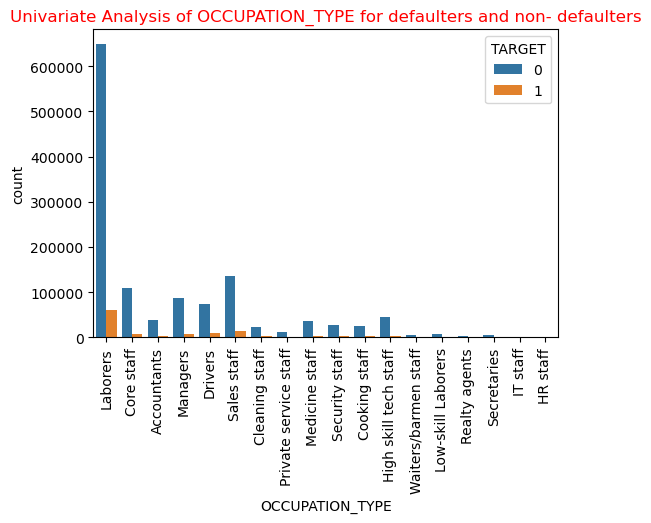

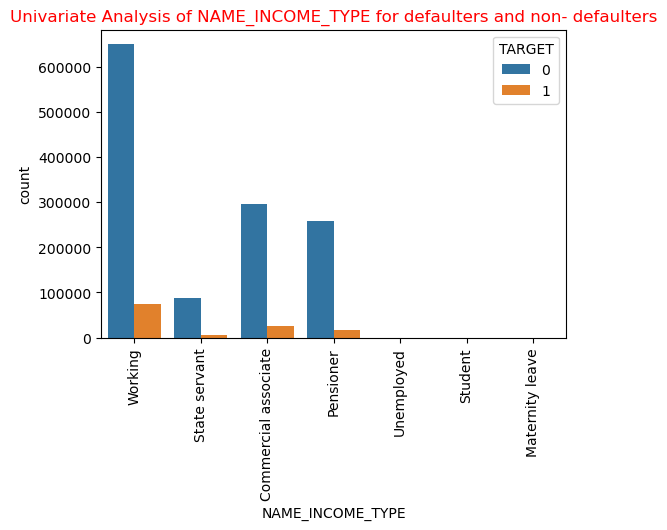

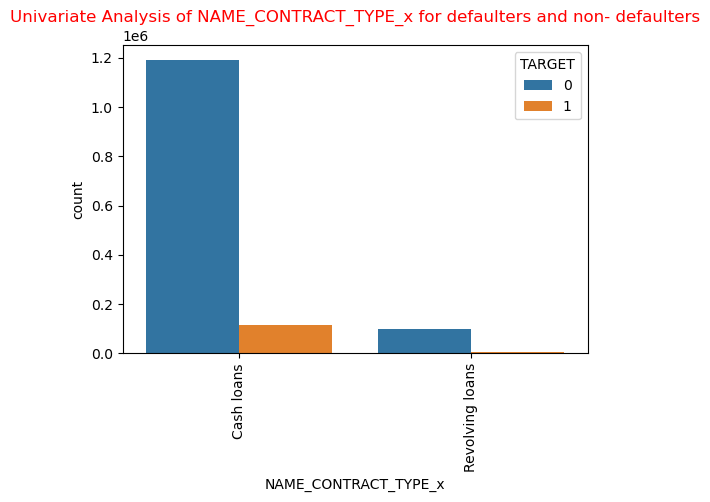

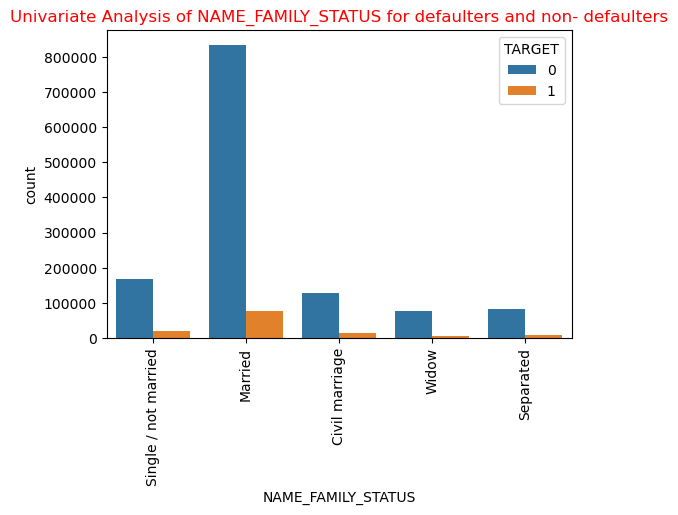

In [288]:
#lets do univariate analysis on few columns with default clients:
list_1 = ['OCCUPATION_TYPE', 'NAME_INCOME_TYPE', 'NAME_CONTRACT_TYPE_x','NAME_FAMILY_STATUS']

for i in list_1:
    plt.figure(figsize=(6, 4))
    if new_data[i].dtype == 'object':
        sns.countplot(x=i, data=new_data, hue = "TARGET")
    else:
        sns.histplot(x=i, hue = "Target", data= new_data, kde=True)
    plt.title(f"Univariate Analysis of {i} for defaulters and non- defaulters", color = "red")
    plt.xticks(rotation=90)
    plt.show()
        


In [ ]:
#conclusion:
1.'OCCUPATION_TYPE' - occupations like labourers, sales staff, drivers indicates that they are paid less and their job is unstable too.
2.'NAME_INCOME_TYPE' - as people who are working will and pensioner are somewhat higher defaulters as working people may ahve unstable jobs and pensioners merely get small amount of pension.
3.'NAME_CONTRACT_TYPE_x' - here people who opted for cash loans are defaulters we can say that if they fail to pay bank will be in risk.
4.'NAME_FAMILY_STATUS' here we can observe that married clients are more likely to be defaulters as compared to others as we can say they have other expenses too.

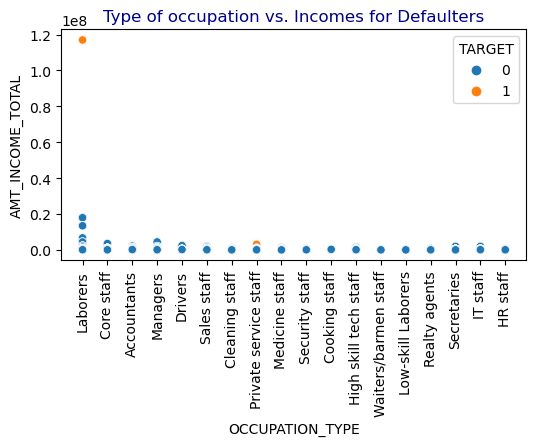

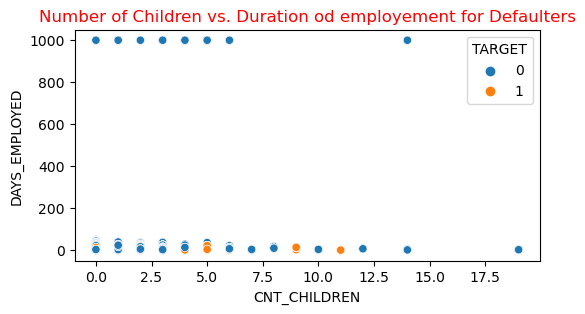

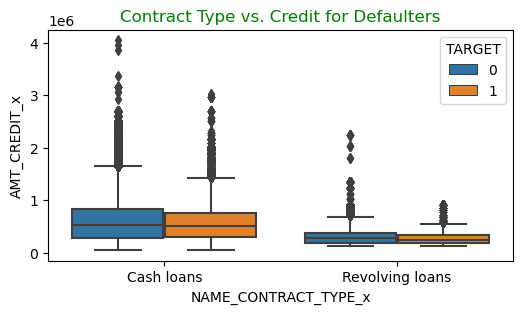

In [290]:
# Bivariate Analysis of few columns with defaults:
# TARGET 1 = DEFAULTERS
# TARGET 0 = NON- DEFAULTERS
plt.figure(figsize=(6, 3))
sns.scatterplot(x='OCCUPATION_TYPE', y='AMT_INCOME_TOTAL', hue='TARGET', data=new_data)
plt.title('Type of occupation vs. Incomes for Defaulters',color="darkblue")
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(6, 3))
sns.scatterplot(x='CNT_CHILDREN', y='DAYS_EMPLOYED', hue='TARGET', data=new_data)
plt.title('Number of Children vs. Duration od employement for Defaulters',color="red")
plt.show()

plt.figure(figsize=(6, 3))
sns.boxplot(x='NAME_CONTRACT_TYPE_x', y='AMT_CREDIT_x', hue='TARGET', data=new_data)
plt.title('Contract Type vs. Credit for Defaulters',color = "green")
plt.show()

In [ ]:
1.'Type of occupation vs. Incomes for Defaulters'- this confirms that people with less pay like laborers and drivers are defaulters
2.'Number of Children vs. Duration od employement for Defaulters'- shows people with more children and lesser days of work are likely to be defaulters.
3.'Contract Type vs. Credit for Defaulters'- indicates people who opted for cash loans are defaulters.

In [291]:
# Segmented the data by target variable:
data_1 = new_data[new_data['TARGET'] == 1] # shows client with payment difficulties
data_0 = new_data[new_data['TARGET'] == 0] # clients with no payment difficultie, other cases

In [292]:
# Selecting the variables(columns) to analyse:
selected_vars = ['AMT_INCOME_TOTAL', 'AMT_CREDIT_x', 'DAYS_EMPLOYED', 'CNT_CHILDREN', 'CNT_FAM_MEMBERS', 'EXT_SOURCE_2','AMT_CREDIT_y','AMT_ANNUITY_y','AMT_APPLICATION','AMT_ANNUITY_x',"CNT_PAYMENT"]


In [293]:
#matrix of correlation for loan defaulters
correlation_of_defaulters = data_1[selected_vars].corr()


In [158]:
# Correlation matrix for non-defaulters
correlation_of_others = data_0[selected_vars].corr()



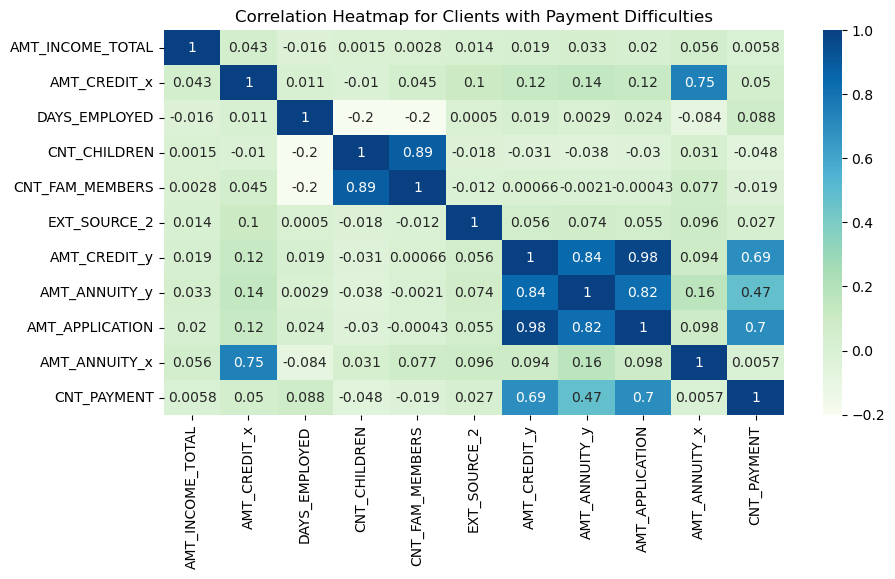

In [294]:
# Heatmap for loan defaulters
plt.figure(figsize=(10, 5))
sns.heatmap(correlation_of_defaulters, annot=True, cmap='GnBu')
plt.title('Correlation Heatmap for Clients with Payment Difficulties')
plt.show()


# conclusions (defaulters)😠

1.CNT_CHILDREN and CNT_FAM_MEMBERS: indicates that people having more children or large family has more difficulty in paying loans, as large families have extra expenses to deal with.

2.AMT_CREDIT_X and AMT_ANNUITY_X : shows high correlation as larger the amount the bank has approved larger the amount(installment amount)to be paid on time which may become difficult for some clients.

3.AMT_APPLICATION and AMT_CREDIT_y : shows the amount person ask from the bank and the amount bank agreed to give are close. if a person asks for large amount they have to pay more amount in installments too.

4.AMT_CREDIT_y and CNT_PAYMENT ; indicates the more the amount borrowed the more number of payments have to be made, but in case of elderly people it can become a risk for lending out large amount for more days.

5.AMT_CREDIT_Y and AMT_ANNUITYY; this shows if a person has already taken a large amount of loan previously means they are paying huge amount of installments too which makes it riskier for the bank to give them loan again if their income and job is not stable.
    

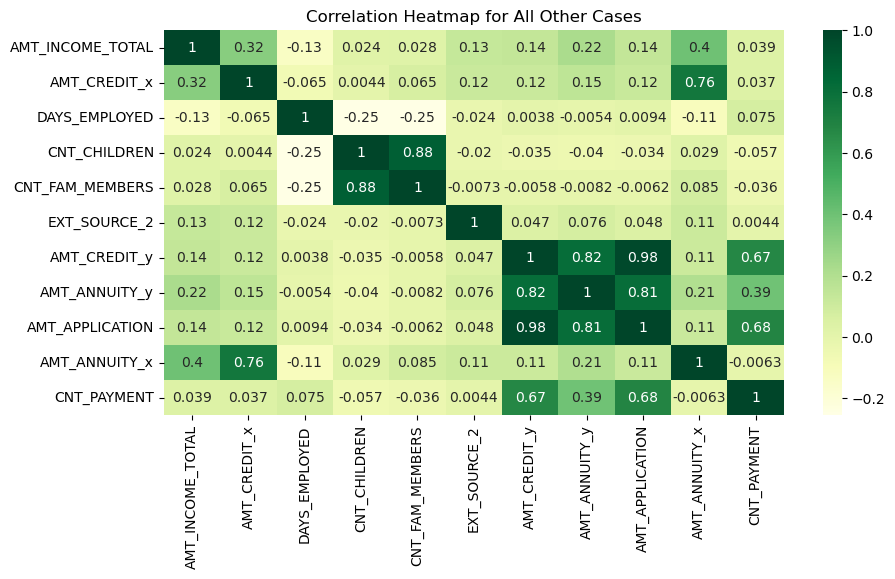

In [295]:
# Heatmap for others
plt.figure(figsize=(10,5))
sns.heatmap(correlation_of_others, annot=True, cmap='YlGn')
plt.title('Correlation Heatmap for All Other Cases')
plt.show()


# conclusion(non- defaulters)😃

1.AMT_INCOME_TOTAL and AMT_CREDIT_x; indicates the more the person earns the more easier for them to pay installment amounts making it easy for bank sto approve their loans.

2.DAYS_EMPLOYED  and CNT_FAM_MENBERS; more the number of days of employment means stable job so even if they hav ebig family it won't be difficult for people to repay loan.

3.CNT_CHILDREN and AMT_INCOME_TOTAL; indicates more the children more members in family to earn and thus making it easier to be non defaulter.

4.AMT_ANNUITY_x and AMT_CREDIT_x: This reflects a standard loan terms between the two showing that borrowing is well managed.

5.EXT_SOURCE_2 and AMT_ANNUITY_y: indicates how external sources scores affect the lending process. high the score more easily the person will get the loan.